# EDA

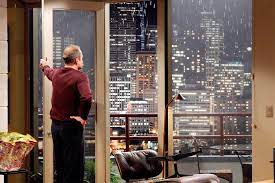

In [2]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
# read in csv file and display first 5 rows of datset
df_n0 = pd.read_csv("data/eda_my_project.csv")
df_n0.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000


## Zooming in on data sets

In [4]:
# Let's have a look at the shape of our dataset, meaning how long and wide it is.
df_n0.shape

(21597, 21)

In [5]:
# check which columns are included in our dataframe
df_n0.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price'],
      dtype='object')

In [6]:
# Let's have a look at the shape of our dataset, meaning how long and wide it is.
df_n0.tail()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
21592,263000018,3.000,2.500,1530.000,1131.000,3.000,0.000,0.000,3,8,...,0.000,2009,0.000,98103,47.699,-122.346,1530.000,1509.000,2014-05-21,360000.000
21593,6600060120,4.000,2.500,2310.000,5813.000,2.000,0.000,0.000,3,8,...,0.000,2014,0.000,98146,47.511,-122.362,1830.000,7200.000,2015-02-23,400000.000
21594,1523300141,2.000,0.750,1020.000,1350.000,2.000,0.000,0.000,3,7,...,0.000,2009,0.000,98144,47.594,-122.299,1020.000,2007.000,2014-06-23,402101.000
21595,291310100,3.000,2.500,1600.000,2388.000,2.000,NaN,0.000,3,8,...,0.000,2004,0.000,98027,47.535,-122.069,1410.000,1287.000,2015-01-16,400000.000
21596,1523300157,2.000,0.750,1020.000,1076.000,2.000,0.000,0.000,3,7,...,0.000,2008,0.000,98144,47.594,-122.299,1020.000,1357.000,2014-10-15,325000.000


In [7]:
# We now want to check out our data-types as well as get a feeling for possible missing values
df_n0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

In [8]:
df_n0.duplicated().value_counts()
# there are no duplicated value

False    21597
Name: count, dtype: int64

In [9]:
# remove duplicates
#df_n0 = df_n0.drop_duplicates()
# reset index inplace
#df_n0.reset_index(inplace=True, drop=True)

In [10]:
# Checking NaN values
column_detail = []
for count in df_n0.columns:
  column_detail.append(
      [
       count,
       df_n0[count].dtypes,
       df_n0[count].isnull().sum(),
       df_n0[count].unique(),
       df_n0[count].nunique()]
       )

column_detail = pd.DataFrame(column_detail, columns = ['dcolumn', 'dtype', 'null', 'unique', 'nunique'])
print(f"Total number of column: {len(df_n0.columns)}.", column_detail)

Total number of column: 21.           dcolumn    dtype  null  \
0              id    int64     0   
1        bedrooms  float64     0   
2       bathrooms  float64     0   
3     sqft_living  float64     0   
4        sqft_lot  float64     0   
5          floors  float64     0   
6      waterfront  float64  2391   
7            view  float64    63   
8       condition    int64     0   
9           grade    int64     0   
10     sqft_above  float64     0   
11  sqft_basement  float64   452   
12       yr_built    int64     0   
13   yr_renovated  float64  3848   
14        zipcode    int64     0   
15            lat  float64     0   
16           long  float64     0   
17  sqft_living15  float64     0   
18     sqft_lot15  float64     0   
19           date   object     0   
20          price  float64     0   

                                               unique  nunique  
0   [7129300520, 6414100192, 5631500400, 248720087...    21420  
1   [3.0, 2.0, 4.0, 5.0, 1.0, 6.0, 7.0, 8.0, 9.0,

 date, year, month re-formatting

In [11]:
# type of first date entry
#type(df_n0['date'][0])

In [13]:
# change "date" dtype to datetime with format %Y/%m/%d
#df_n0['date'] = pd.to_datetime(df_n0['date'], format='%Y/%m/%d')
df_n0.date = pd.to_datetime(df_n0.date)
# Create new column for year
df_n0['year'] = df_n0.date.dt.year
# Create new column for year-month (string format time)
df_n0['year_month'] = df_n0['date'].dt.strftime('%Y-%m')
df_n0.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,year,year_month
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,2014,2014-10
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,2014,2014-12
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,2015,2015-02
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2014,2014-12
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,2015,2015-02


## Data cleaning 

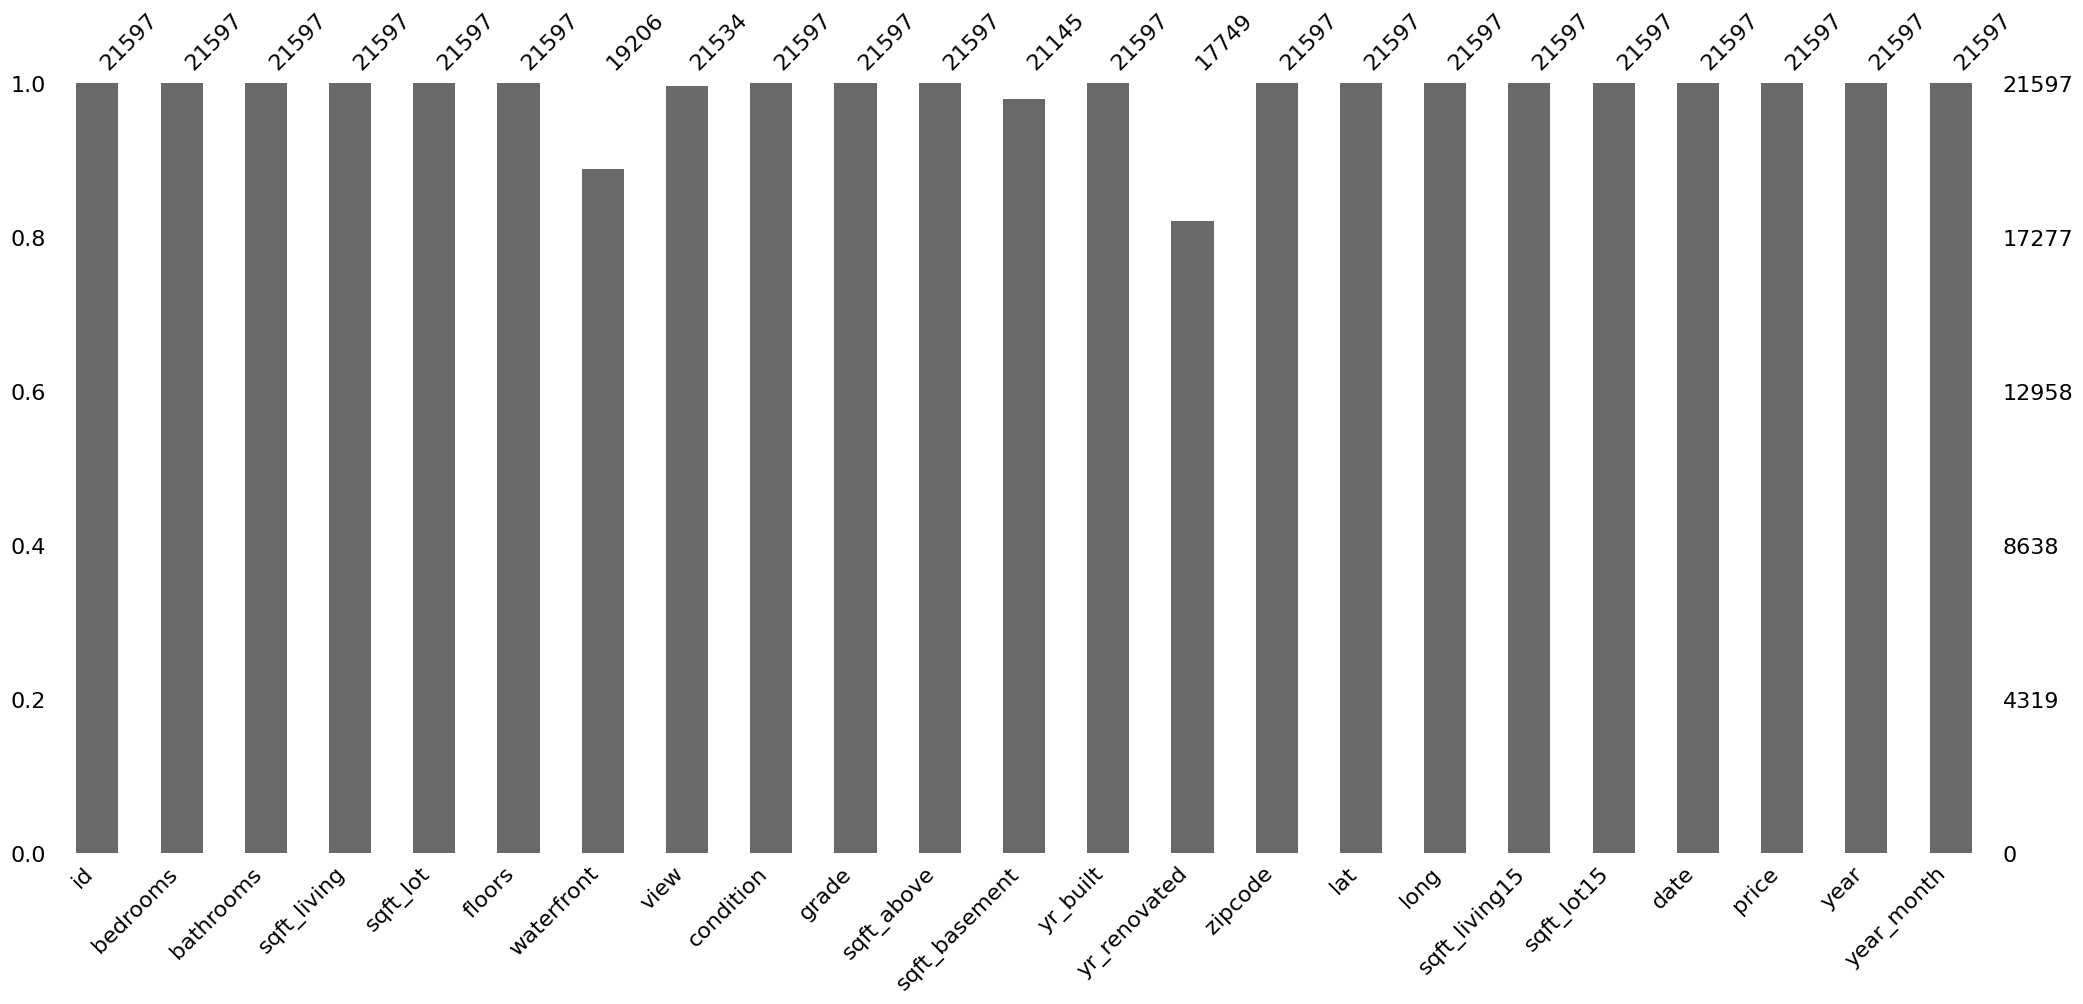

In [15]:
# import missingno
import missingno as msno
colors = ["#9ecae1", "#6baed6", "#3182bd", "#08519c"] 
# plotting percentage of missing values per column
msno.bar(df_n0)#, color=colors[0]) 
plt.savefig('Figures_EDA/NaN_column.pdf')
#msno.bar(df_n0)

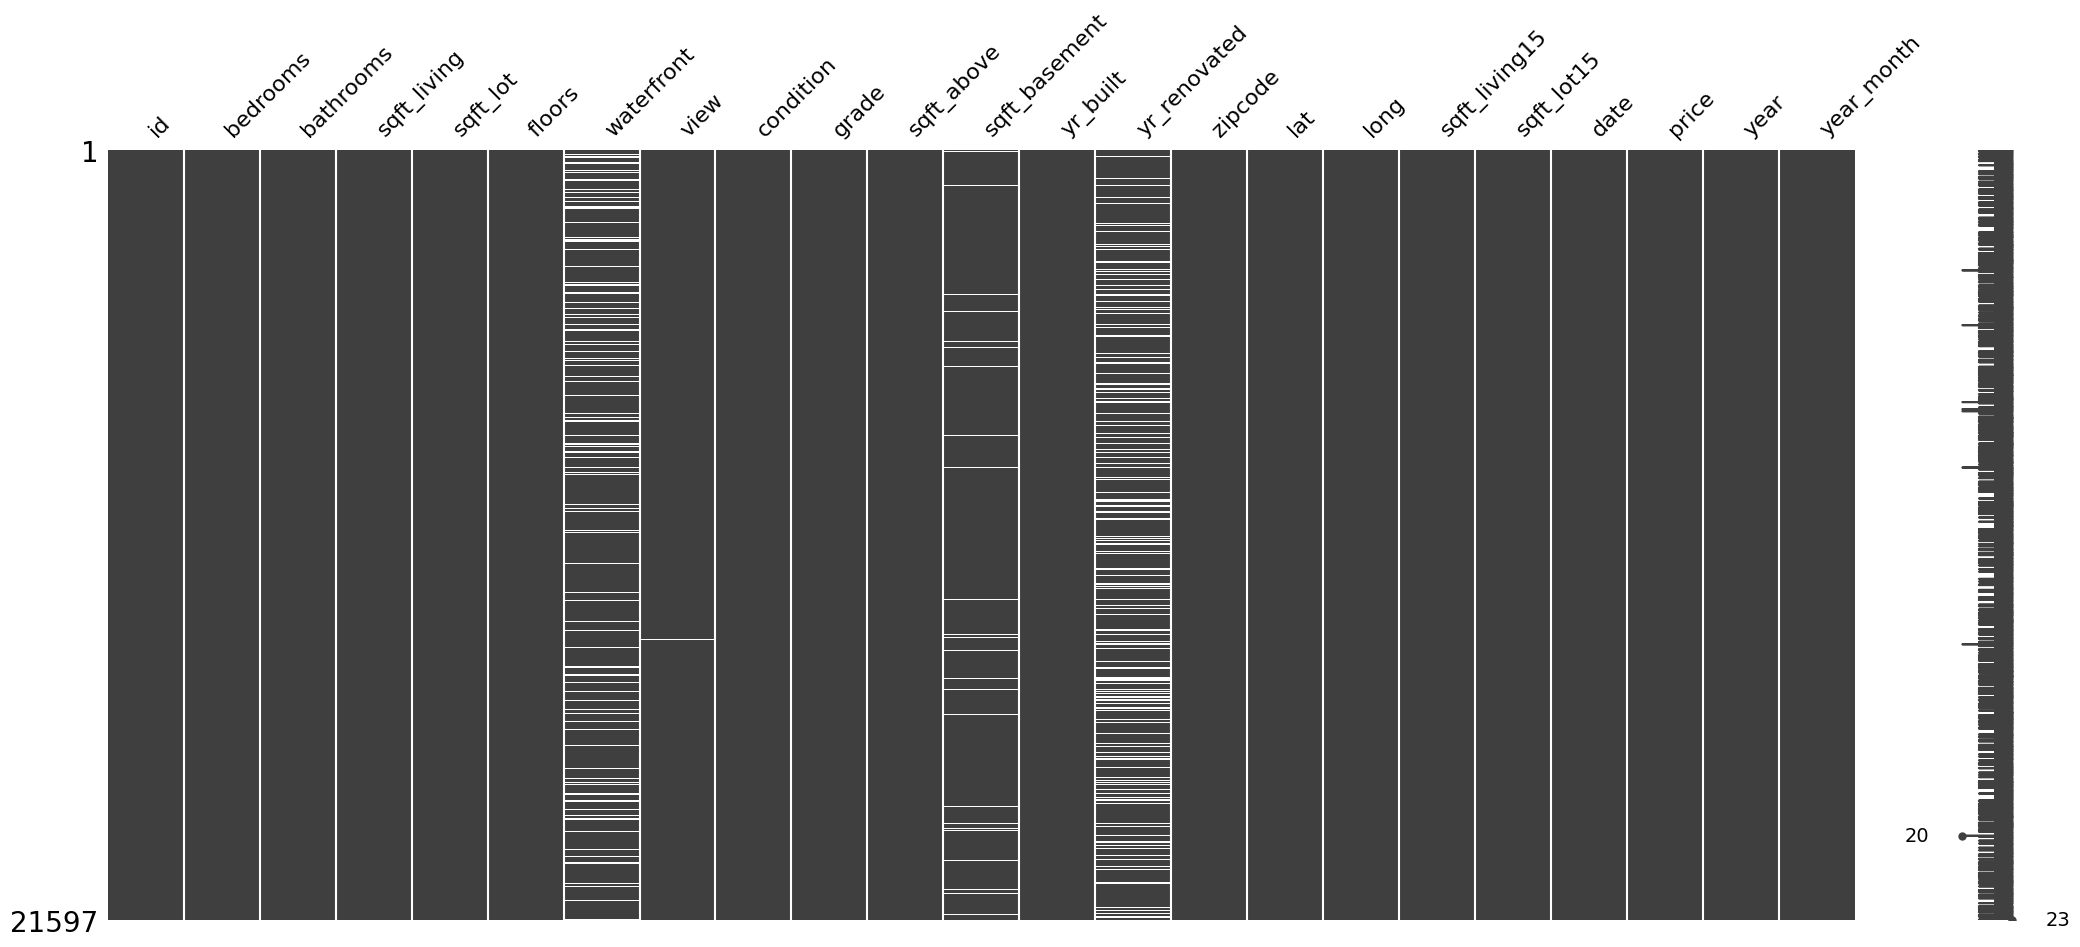

In [16]:
#msno.bar(df_n0_dc['waterfront,yr_renovated', sqft_basement], color=colors[0]) 
msno.matrix(df_n0)
plt.savefig('Figures_EDA/NaN_patter.pdf')

In [17]:
print(f"numbers of rows : {df_n0.shape[0]}")
print(f"missing values in waterfront : {round(df_n0.waterfront.isna().sum()/df_n0.shape[0]*100,2)} %")
print(f"missing values in yr_renovated : {round(df_n0.yr_renovated.isna().sum()/df_n0.shape[0]*100,2)} %")
print(f"missing values in sqft_basement : {round(df_n0.sqft_basement.isna().sum()/df_n0.shape[0]*100,2)} %")
print(f"missing values in view : {round(df_n0.view.isna().sum()/df_n0.shape[0]*100,2)} %")
print(f"missing values in data frame : {round(df_n0.isna().sum().sum()/(df_n0.shape[0]*df_n0.shape[1])*100,2)} %")

numbers of rows : 21597
missing values in waterfront : 11.07 %
missing values in yr_renovated : 17.82 %
missing values in sqft_basement : 2.09 %
missing values in view : 0.29 %
missing values in data frame : 1.36 %


##  Missing values: 
* Replace 0 with NaN 

* Dropping data points with NaN values [df.dropna()] 

* Reformatting of 'yr_renovated' colum (year0 (float) -> year (int))

In [18]:

#print(df_n0['yr_renovated'].unique())
df_n0['yr_renovated'] = df_n0['yr_renovated'].replace(0, np.nan)
df_n0_dpnan = df_n0.dropna().reset_index() 
#df_n0_dpnan.reset_index() 
#print(df_n0_dpnan['yr_renovated'].unique())
print(f"missing values in data frame : {round(df_n0_dpnan.isna().sum().sum()/(df_n0_dpnan.shape[0]*df_n0_dpnan.shape[1])*100,2)} %")
df_n0_dpnan['yr_renovated']=df_n0_dpnan['yr_renovated'].apply(lambda x : str(x)[:4])
#df_n0_dpnan['yr_renovated'] = df_n0_dpnan.yr_renovated.replace('nan',np.NaN)
df_n0_dpnan['yr_renovated'] = df_n0_dpnan['yr_renovated'].astype(int)
#df_n0_dpnan['yr_renovated'] = pd.to_numeric(df_n0_dpnan['yr_renovated'])
#df_n0_dpnan['yr_renovated'] = df_n0_dpnan['yr_renovated'].apply(np.int64)
print (df_n0_dpnan['yr_renovated'], df_n0_dpnan['yr_renovated'].dtypes)
print(df_n0_dpnan['yr_renovated'].unique())

missing values in data frame : 0.0 %
0      1991
1      2002
2      1991
3      2010
4      1992
       ... 
627    2014
628    2004
629    2006
630    2009
631    2007
Name: yr_renovated, Length: 632, dtype: int64 int64
[1991 2002 2010 1992 2013 1994 1978 2005 2003 1984 1954 2014 2011 1983
 1990 1988 1977 1981 1995 2000 1999 1998 1970 1989 2004 1986 2007 1987
 2006 1985 1980 1971 1945 1979 1997 1950 1969 1948 2009 2015 2008 2012
 1968 1963 1951 1962 2001 1953 1993 1955 1996 1982 1956 1940 1976 1975
 1964 1973 1957 1959 1960 1965 1967 1934 1972 1944 1958 1974]


##  Missing values: 
* Replace NaN data points with zero's [df_n0.fillna(0)] 

* Reformatting of 'yr_renovated' column (year0 (float) -> year (int))

* The whole data analysis is performed with this method


In [19]:
#print (df_n0["waterfront"].isnull().sum(),df_n0["yr_renovated"].isnull().sum(),df_n0["view"].isnull().sum(),df_n0["sqft_basement"].isnull().sum())
#df_n0[["waterfront","yr_renovated","view", "sqft_basement"]] = df_n0[["waterfront","yr_renovated","view", "sqft_basement"]].fillna(0, inplace=True)
df_n0[["waterfront","yr_renovated","view", "sqft_basement"]] = df_n0[["waterfront","yr_renovated","view", "sqft_basement"]].fillna(0)
df_n0[["waterfront","yr_renovated","view", "sqft_basement"]].reset_index() 
df_n0['yr_renovated']=df_n0['yr_renovated'].apply(lambda x : str(x)[:4])
df_n0['yr_renovated'] = df_n0.yr_renovated.replace('nan',np.NaN)
#df_n0['yr_renovated'] = df_n0['yr_renovated'].astype(int)
df_n0['yr_renovated'] = df_n0['yr_renovated'].astype(float).astype('Int64')
#print (df_n0['yr_renovated'],df_n0['yr_renovated'].dtypes)
print (df_n0["waterfront"].isnull().sum(),df_n0["yr_renovated"].isnull().sum(),df_n0["view"].isnull().sum(),df_n0["sqft_basement"].isnull().sum())
print(df_n0[["waterfront","yr_renovated","view", "sqft_basement"]])
print(df_n0['yr_renovated'].unique(),df_n0['yr_renovated'].nunique())
df_n0['yr_renovated'] = df_n0['yr_renovated'].replace(0, np.nan)
df_n0 = df_n0.dropna().reset_index() 
#print(df_n0['yr_renovated'].unique(),df_n0['yr_renovated'].nunique())
#print(df_n0['view'].unique(),df_n0['view'].nunique())
print(df_n0['waterfront'].unique(),df_n0['waterfront'].nunique())

0 0 0 0
       waterfront  yr_renovated  view  sqft_basement
0           0.000             0 0.000          0.000
1           0.000          1991 0.000        400.000
2           0.000             0 0.000          0.000
3           0.000             0 0.000        910.000
4           0.000             0 0.000          0.000
...           ...           ...   ...            ...
21592       0.000             0 0.000          0.000
21593       0.000             0 0.000          0.000
21594       0.000             0 0.000          0.000
21595       0.000             0 0.000          0.000
21596       0.000             0 0.000          0.000

[21597 rows x 4 columns]
<IntegerArray>
[   0, 1991, 2002, 2010, 1992, 2013, 1994, 1978, 2005, 2003, 1984, 1954, 2014,
 2011, 1983, 1945, 1990, 1988, 1977, 1981, 1995, 2000, 1999, 1998, 1970, 1989,
 2004, 1986, 2007, 1987, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
 1948, 2009, 2015, 1974, 2008, 1968, 2012, 1963, 1951, 1962, 1953, 1993, 1996,

In [20]:
print(f"numbers of rows : {df_n0.shape[0]}")
print(f"missing values in waterfront : {round(df_n0.waterfront.isna().sum()/df_n0.shape[0]*100,2)} %")
print(f"missing values in yr_renovated : {round(df_n0.yr_renovated.isna().sum()/df_n0.shape[0]*100,2)} %")
print(f"missing values in sqft_basement : {round(df_n0.sqft_basement.isna().sum()/df_n0.shape[0]*100,2)} %")
print(f"missing values in view : {round(df_n0.view.isna().sum()/df_n0.shape[0]*100,2)} %")


numbers of rows : 744
missing values in waterfront : 0.0 %
missing values in yr_renovated : 0.0 %
missing values in sqft_basement : 0.0 %
missing values in view : 0.0 %


In [21]:
df_n0[df_n0['bedrooms'] < 1]
# all  houses has at least one bedrooms 

,index,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,year,year_month


In [22]:
df_n0[df_n0['bathrooms'] == 0]
# all  houses has at least one bedrooms 

,index,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,year,year_month


In [23]:
#df_n0['bedrooms'] = df_n0['bedrooms'].replace(0, df_n0['bedrooms'].median())
#df_n0['bathrooms'] = df_n0['bathrooms'].replace(0, df_n0['bathrooms'].median()) 
# instead of mean we can also use mean

## Feature engineering


In [ ]:

 # New columns  'df_n0['house_age'] = df_n0['date'].dt.year - df_n0['yr_built']'
 #df_n0['price_by_sqft'] = df_n0['price']/df_n0['sqft_lot']

In [24]:
df_n0['house_age'] = df_n0['date'].dt.year - df_n0['yr_built']
df_n0_dpnan['house_age'] = df_n0_dpnan['date'].dt.year - df_n0_dpnan['yr_built']
#df_n0['house_age'].sort_values(), df_n0_dpnan['house_age'].sort_values()

In [25]:
df_n0['house_age_yr'] = df_n0['date'].dt.year - df_n0['yr_renovated']
df_n0_dpnan['house_age_yr'] = df_n0_dpnan['date'].dt.year - df_n0_dpnan['yr_renovated']

In [26]:
# price per sqft
df_n0['price_by_sqft'] = df_n0['price']/df_n0['sqft_lot']
df_n0_dpnan['price_by_sqft'] = df_n0_dpnan['price']/df_n0_dpnan['sqft_lot']
# I  have use this formula to calcualte  
#https://www.thebalancemoney.com/how-to-calculate-the-land-to-building-ratio-2866427

## Check for correlations

In [27]:
corr_columns_1=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_renovated', 'sqft_above',
       'sqft_basement', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'house_age']
corr_mtrx_11=df_n0[corr_columns_1].corr()

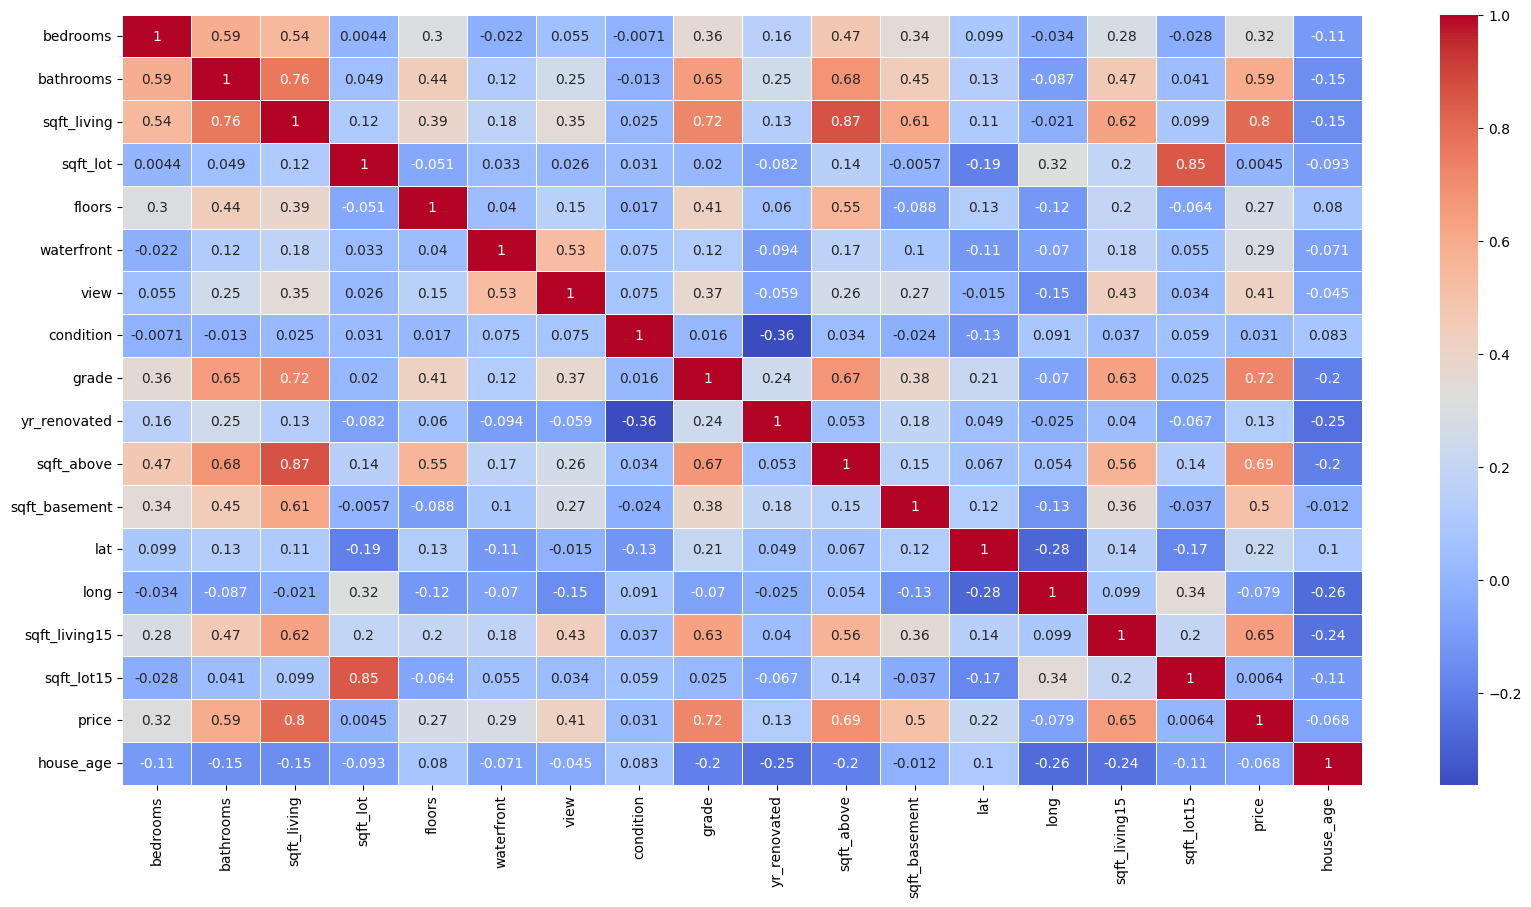

In [28]:
plt.figure(figsize = (20,10))
ax= sns.heatmap(corr_mtrx_11, linewidths=.5, annot=True, cmap='coolwarm')
plt.savefig('Figures_EDA/correlation_mastrix.pdf')

Notable positive relationships between
- Price and: sqft_living, grade, sqft_above, sqft_living15, bathrooms, bedroom, view, floors, sqft_basement

There are no relationships between price long, and house age.


## Descriptive Statistics

* We  are dropping out the columns which has negative correlations with price

In [29]:
df_n0_dc=df_n0.drop(columns =['id', 'sqft_lot','sqft_above','sqft_basement','lat','long','sqft_lot15', 'date','year', 'year_month', 'zipcode'])

In [30]:
# In this data sets we replace NaN by zeros
df_n0_dc.describe()

,index,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,yr_renovated,sqft_living15,price,house_age,house_age_yr,price_by_sqft
count,744.000,744.000,744.000,744.000,744.000,744.000,744.000,744.000,744.000,744.000,744.000,744.000,744.000,744.000,744.000,744.000
mean,10079.448,3.460,2.306,2327.378,1.505,0.039,0.599,3.219,7.753,1939.456,1995.929,1988.878,768901.892,74.819,18.345,106.158
std,5894.408,1.069,0.898,1089.002,0.493,0.194,1.212,0.520,1.197,22.089,15.600,715.440,627125.794,22.092,15.611,83.772
min,1.000,1.000,0.750,520.000,1.000,0.000,0.000,1.000,4.000,1900.000,1934.000,828.000,110000.000,11.000,-1.000,0.978
25%,4753.250,3.000,1.750,1560.000,1.000,0.000,0.000,3.000,7.000,1921.000,1987.000,1460.000,412250.000,59.000,7.000,40.429
50%,10182.000,3.000,2.250,2200.000,1.500,0.000,0.000,3.000,8.000,1941.500,2000.000,1850.000,607502.000,73.000,15.000,81.496
75%,15258.750,4.000,2.750,2872.500,2.000,0.000,0.000,3.000,8.000,1955.000,2007.250,2380.000,900000.000,93.000,27.000,153.212
max,20946.000,11.000,8.000,12050.000,3.000,1.000,4.000,5.000,13.000,2003.000,2015.000,5500.000,7700000.000,115.000,80.000,467.500


In [31]:
df_n0_dpnan_dc=df_n0_dpnan.drop(columns =['id', 'sqft_lot','sqft_above','sqft_basement','lat','long','sqft_lot15', 'date','year', 'year_month', 'zipcode'])

In [32]:
# In this data sets we dropout out  NaN data sets 
df_n0_dpnan_dc.describe()

,index,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,yr_renovated,sqft_living15,price,house_age,house_age_yr,price_by_sqft
count,632.000,632.000,632.000,632.000,632.000,632.000,632.000,632.000,632.000,632.000,632.000,632.000,632.000,632.000,632.000,632.000
mean,10086.201,3.456,2.292,2297.119,1.489,0.043,0.576,3.217,7.726,1939.772,1996.171,1972.198,758813.638,74.500,18.101,105.695
std,5890.728,1.086,0.902,1092.662,0.493,0.202,1.196,0.509,1.189,22.029,15.516,704.259,636316.039,22.024,15.528,83.935
min,1.000,1.000,0.750,520.000,1.000,0.000,0.000,2.000,4.000,1900.000,1934.000,828.000,110000.000,11.000,-1.000,0.978
25%,4863.000,3.000,1.750,1540.000,1.000,0.000,0.000,3.000,7.000,1922.000,1987.000,1450.000,411125.000,59.000,6.750,39.708
50%,10306.000,3.000,2.250,2155.000,1.500,0.000,0.000,3.000,8.000,1942.000,2000.000,1845.000,600000.000,72.500,15.000,79.795
75%,15298.000,4.000,2.750,2852.500,2.000,0.000,0.000,3.000,8.000,1955.000,2008.000,2370.000,885625.000,93.000,27.000,151.501
max,20946.000,11.000,8.000,12050.000,3.000,1.000,4.000,5.000,13.000,2003.000,2015.000,5500.000,7700000.000,115.000,80.000,434.286


## Data Visualization

Outliers Check

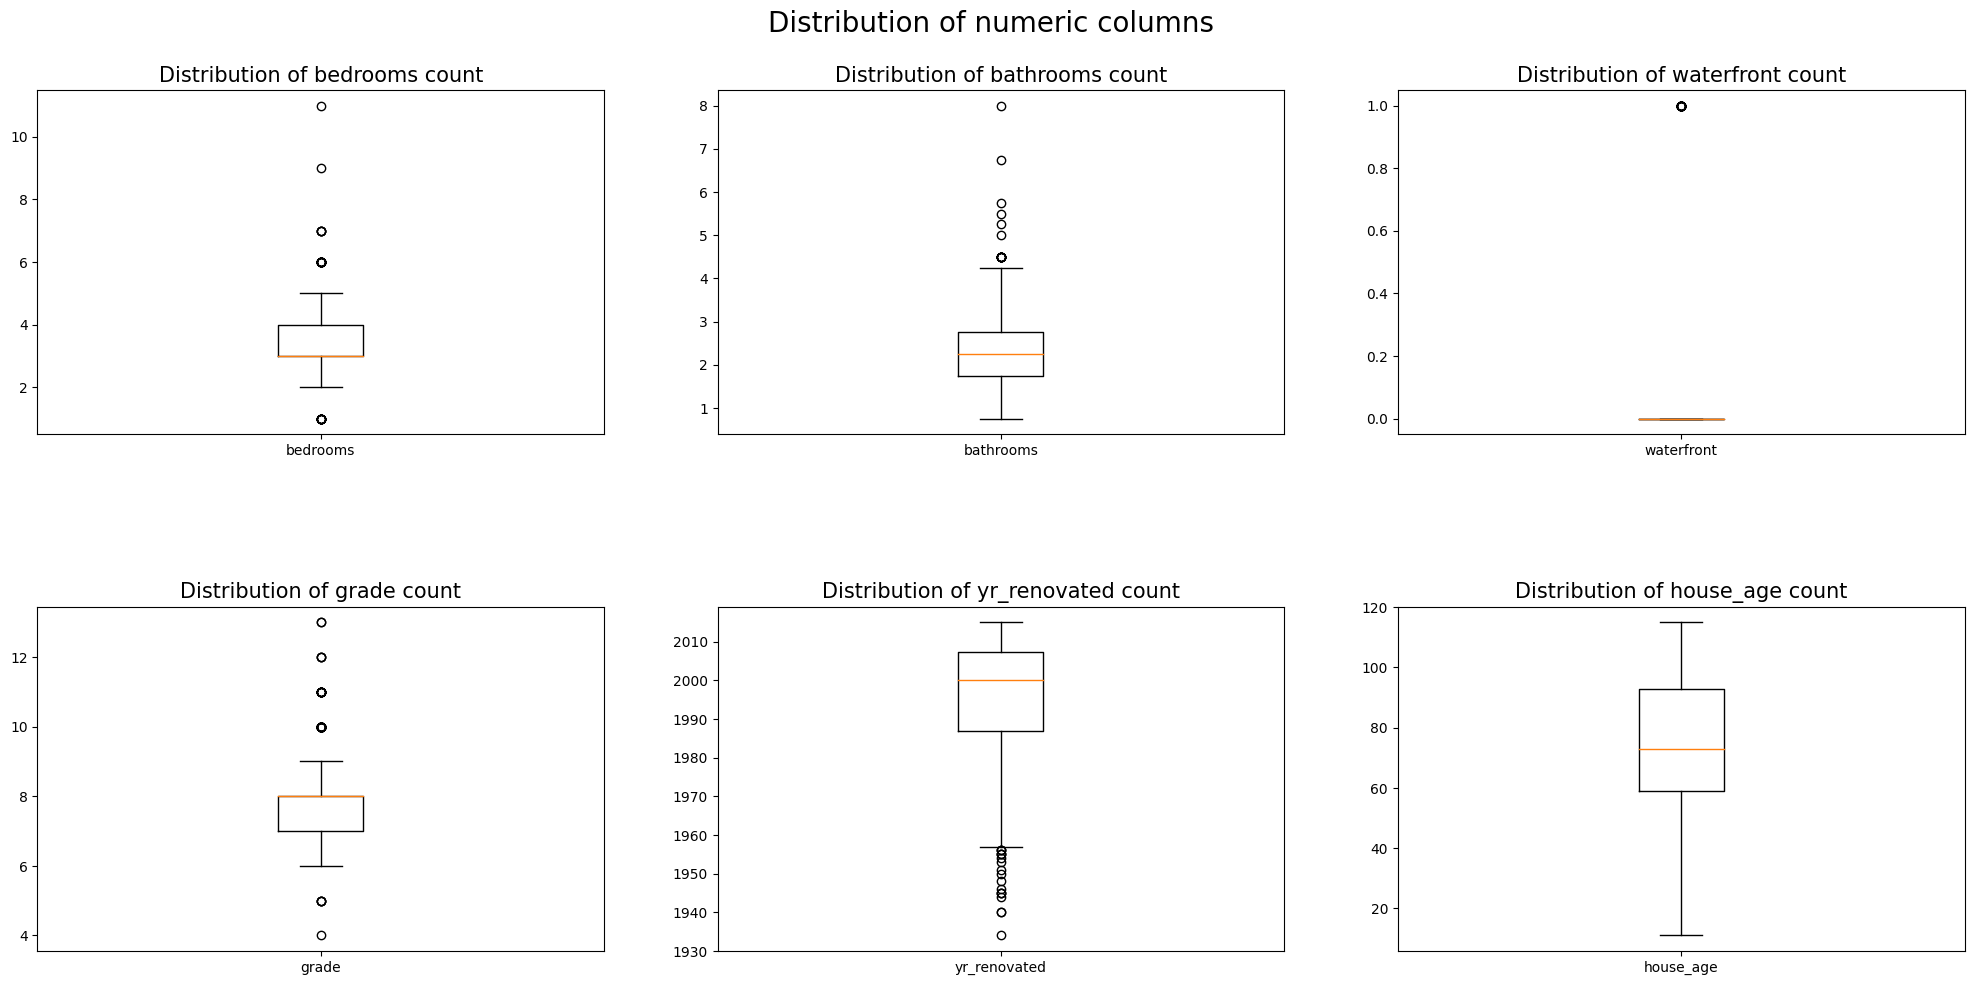

In [34]:
fig, ax = plt.subplots(2,3, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0][0].boxplot(x = df_n0['bedrooms']) # creates boxplot for number of views
ax[0][0].set_xticklabels(labels=["bedrooms"]) # sets the label for the ticks on the x-axis
#ax[0][0].set_ylim(0,40) # limits the y-axis values from 0 to 2000000 
ax[0][0].set_title("Distribution of bedrooms count", fontsize = 15); # sets title for subplot

ax[0][1].boxplot(x = df_n0['bathrooms'])
ax[0][1].set_xticklabels(labels=["bathrooms"])
#ax[0][1].set_ylim(0,10)
ax[0][1].set_title("Distribution of bathrooms count", fontsize = 15);

ax[0][2].boxplot(x = df_n0['waterfront'])
ax[0][2].set_xticklabels(labels=["waterfront"])
#ax[0][2].set_ylim(0,1)
ax[0][2].set_title("Distribution of waterfront count", fontsize = 15);

ax[1][0].boxplot(x = df_n0['grade'])
ax[1][0].set_xticklabels(labels=["grade"])
#ax[1][0].set_ylim(0,15)
ax[1][0].set_title("Distribution of grade count", fontsize = 15);
                              
ax[1][1].boxplot(x = df_n0['yr_renovated'])
ax[1][1].set_xticklabels(labels=["yr_renovated"])
#ax[1][1].set_ylim(0,22000)
ax[1][1].set_title("Distribution of yr_renovated count", fontsize = 15);

ax[1][2].boxplot(x = df_n0['house_age'])
ax[1][2].set_xticklabels(labels=["house_age"])
#ax[1][1].set_ylim(0,22000)
ax[1][2].set_title("Distribution of house_age count", fontsize = 15);
plt.savefig('Figures_EDA/outliers_boxplot.pdf')
#fig.delaxes(ax[1][2]);

Data sets contain outliers

Histograms

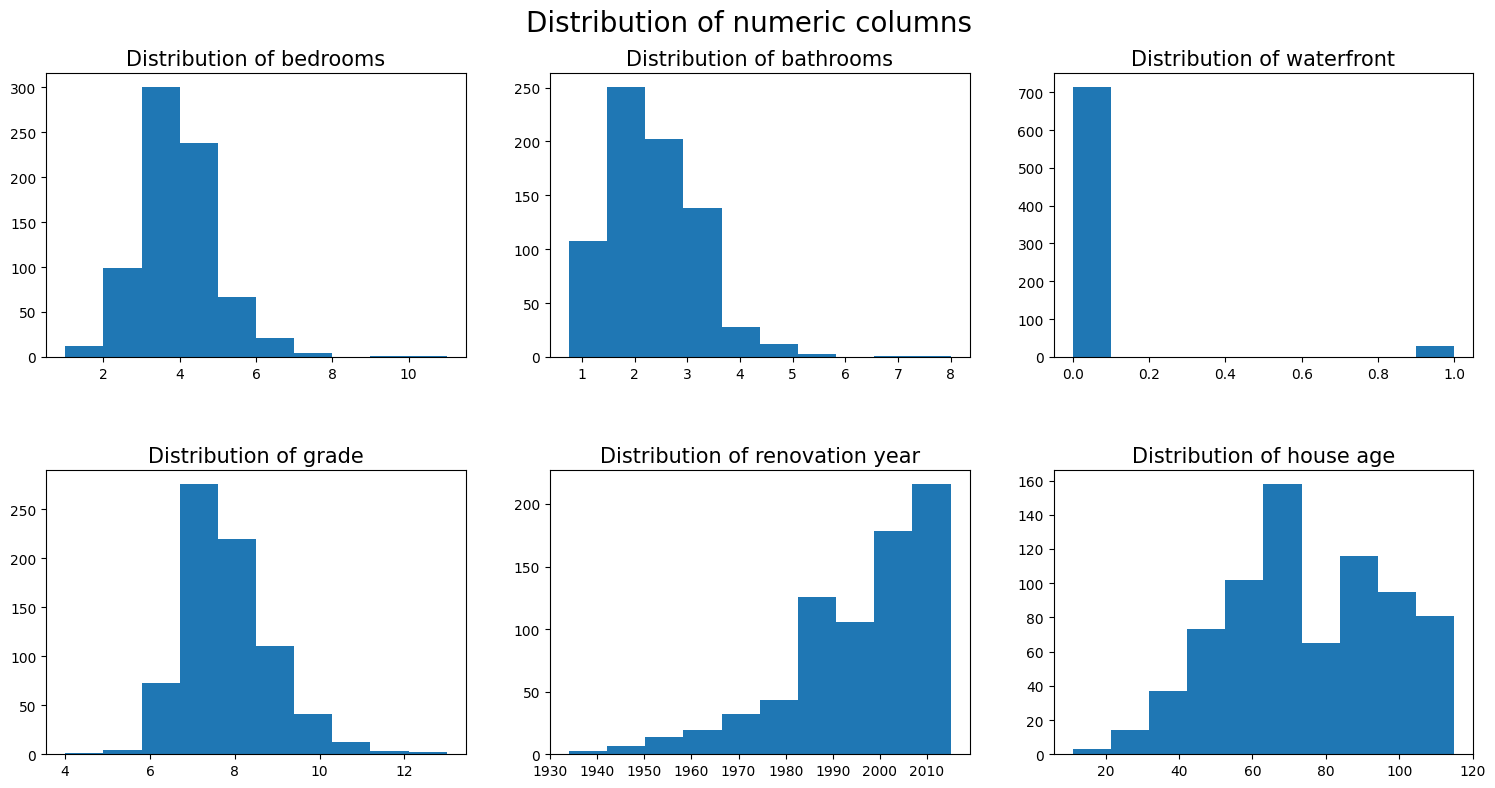

In [36]:
fig, ax = plt.subplots(2,3, figsize=(15,8)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .4, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0][0].hist(x=df_n0['bedrooms'])#, bins=5)  # creates histogram for number of views
#ax[0][0].set_ylabel("No of houses", fontsize = 8) # sets the label y-axis
ax[0][0].set(ylabel=None)
#ax[0][0].set_xlim(0,1000000) # limits the x-axis values from 0 to 1000000 
ax[0][0].set_title("Distribution of bedrooms", fontsize = 15);  # sets title for subplot

ax[0][1].hist(x= df_n0['bathrooms'])#, bins=500)
#ax[0][1].set_ylabel("No of houses", fontsize = 8)
ax[0][1].set(ylabel=None)
#ax[0][1].set_xlim(0,50000)
ax[0][1].set_title("Distribution of bathrooms", fontsize = 15);

ax[0][2].hist(x=df_n0['waterfront'])#, bins=500)
#ax[0][2].set_ylabel("No of houses", fontsize = 8)
ax[0][2].set(ylabel=None)
#ax[0][2].set_xlim(0,6000)
ax[0][2].set_title("Distribution of waterfront", fontsize = 15);

ax[1][0].hist(x=df_n0['grade'])#, bins=100)
#ax[1][0].set_ylabel("No of houses", fontsize = 8)
ax[1][0].set(ylabel=None)
#ax[1][0].set_xlim(0,20000)
ax[1][0].set_title("Distribution of grade", fontsize = 15);
                              
ax[1][1].hist(x=df_n0['yr_renovated'])#, bins=100)
#ax[1][1].set_ylabel("No of houses", fontsize = 8)
ax[1][1].set(ylabel=None)
#ax[1][1].set_xlim(0,10)
ax[1][1].set_title("Distribution of renovation year", fontsize = 15);

ax[1][2].hist(x=df_n0['house_age'])#, bins=100)
#ax[1][2].set_ylabel("No of houses", fontsize = 8)
ax[1][2].set(ylabel=None)
#ax[1][2].set_xlim(0,10)
ax[1][2].set_title("Distribution of house age", fontsize = 15);
plt.savefig('Figures_EDA/distribution_histplot.pdf')
#fig.delaxes(ax[1][2]);


* Mean, Median and Mode are different 

 House prices/sales are maximum if,

* 3 to 4 bedrooms

* 1.5 to 2.5 bathrooms

* No waterfront

* Grade between 7 to 9

*  House is renovated in between 1990-2015 

* House age is in between 60-100

## Client: Jennifer Montgomery 

* Requirements: High budget, wants to show off, timing within a month, waterfront, renovated, high grades, resell within 1 year(buyer)

In [37]:
#for ind in df_n0.index:
#    if df_n0['waterfront'][ind]==0:
#print(ind,df_n0['waterfront'][ind], df_n0['zipcode'][ind], df_n0['yr_renovated'][ind], df_n0['grade'][ind], df_n0['price'][ind], df_n0['house_age'][ind], df_n0['house_age_yr'][ind])

In [38]:
nump = []
for ind in df_n0.index:
    if df_n0['waterfront'][ind]==1:
        print(ind,df_n0['waterfront'][ind], df_n0['zipcode'][ind], df_n0['yr_renovated'][ind], df_n0['grade'][ind], df_n0['house_age_yr'][ind], df_n0['house_age'][ind], df_n0['price'][ind])

8 1.0 98166 1978 7 37 100 655000.0
41 1.0 98166 1990 9 24 46 995000.0
74 1.0 98070 2002 6 13 72 480000.0
112 1.0 98144 2002 10 12 73 3600000.0
126 1.0 98006 1963 8 51 75 1000000.0
149 1.0 98004 2001 11 13 74 7060000.0
152 1.0 98070 2006 9 8 36 1380000.0
171 1.0 98023 1993 7 21 89 1150000.0
186 1.0 98075 2001 9 13 51 1850000.0
224 1.0 98178 1991 8 23 58 1100000.0
255 1.0 98040 1980 9 34 55 2700000.0
295 1.0 98040 2009 12 5 31 4670000.0
322 1.0 98006 1989 10 26 82 1800000.0
334 1.0 98125 1991 8 24 84 1360000.0
341 1.0 98125 1984 8 30 75 1190000.0
400 1.0 98136 1998 8 16 77 1180000.0
453 1.0 98144 1983 8 31 72 1900000.0
524 1.0 98070 1986 8 28 49 600000.0
535 1.0 98070 1997 7 17 71 465000.0
560 1.0 98198 1986 7 28 91 520000.0
573 1.0 98166 1990 12 24 39 1640000.0
578 1.0 98125 1958 7 56 80 1340000.0
611 1.0 98070 1988 7 26 67 800000.0
648 1.0 98198 1991 9 23 38 820000.0
650 1.0 98125 1965 7 50 100 2050000.0
670 1.0 98008 1987 11 27 56 3300000.0
701 1.0 98198 1989 9 25 40 1230000.0
704 1.0

In [39]:
df_nump = []
for ind in df_n0.index:
    if df_n0['waterfront'][ind]==1:
       df_nump.append(
        [
         ind,
         df_n0['zipcode'][ind],
         df_n0['waterfront'][ind],
         df_n0['grade'][ind],
         df_n0['yr_renovated'][ind],
         df_n0['house_age'][ind],
         df_n0['house_age_yr'][ind],
         df_n0['price'][ind],
         df_n0['bedrooms'][ind],
         df_n0['bathrooms'][ind],
         df_n0['view'][ind]]
        )
df_nump = pd.DataFrame(df_nump)
#df_nump[''] = df_nump[''].map({ 1: 'zipcode', 2: 'waterfront', 3: 'grade',
                                   # 5: 'yr_renovated',  6: 'house_age', 7: 'house_age_yr', 8: 'price' })
#print(f"Total number of column: {len(nump.columns)}.", df_nump)    
#print(df_nump[0])#, df_nump[1], df_nump[2])  
#plt.figure(figsize = (20, 10))
#sns.barplot(x = 1, y= 7, data =df_nump , palette = 'viridis',ci = False)
#plt.xticks(rotation = 90)
#plt.title("bedrooms versus zipcode", fontsize = 15)
#plt.tight_layout()

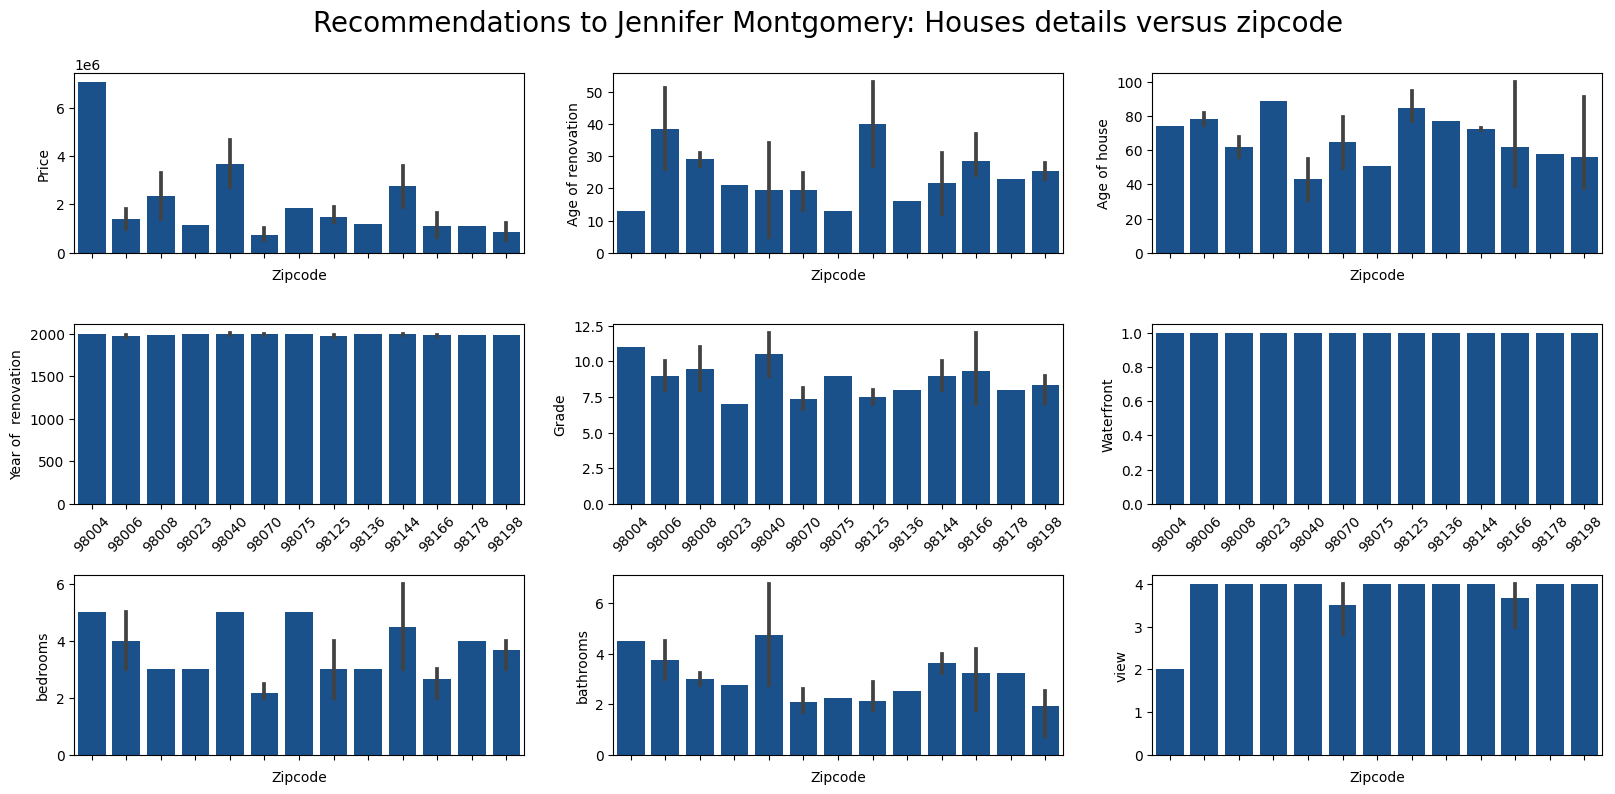

In [40]:
#  1: 'zipcode', 2: 'waterfront', 3: 'grade',
# 5: 'yr_renovated',  6: 'house_age', 7: 'house_age_yr', 8: 'price
colors = ["#9ecae1", "#6baed6", "#3182bd", "#08519c"] 
fig, ax = plt.subplots(3,3, figsize=(16,8)) # create subplots on 2 rows and 2 columns
plt.suptitle('Recommendations to Jennifer Montgomery: Houses details versus zipcode', fontsize=20) 
fig.tight_layout()   # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .4, wspace = .2, top = 0.9) # adjusts the space between the single subplots

f1 = sns.barplot(x = 1, y= 7, data =df_nump,  ax=ax[0,0], color= colors[3])
f1.tick_params(axis='x', labelrotation=45) # sets the label y-axis
f1.set_xlabel("Zipcode", fontsize = 10)
#f1.set(xlabel=None)
f1.set_xticklabels([])
#f1.set(xlabel=None) # sets the x-axis label
f1.set_ylabel("Price", fontsize = 10) # limits the x-axis values from 0 to 1000000
#f1.set_title("price versus zipcode", fontsize = 15);  # sets title for subplot#

f2= sns.barplot(x = 1, y= 6, data =df_nump,  ax=ax[0,1], color= colors[3])
f2.tick_params(axis='x', labelrotation=45)
f2.set(xlabel=None)
f2.set_xticklabels([])
f2.set_xlabel("Zipcode", fontsize = 10)
f2.set_ylabel("Age of renovation", fontsize = 10)
#f2.set_title("house_age_yr versus zipcode", fontsize = 15);

f3 = sns.barplot(x = 1, y= 5, data =df_nump, ax=ax[0,2], color= colors[3])
f3.tick_params(axis='x', labelrotation=45)
#f3.set(xlabel=None)
f3.set_xticklabels([])
f3.set_xlabel("Zipcode", fontsize = 10)
f3.set_ylabel("Age of house", fontsize = 10)
#f3.set_title("house_age versus zipcode", fontsize = 15);



f4 = sns.barplot(x = 1, y= 4, data =df_nump, ax=ax[1,0], color= colors[3])
f4.tick_params(axis='x', labelrotation=45)
f4.set(xlabel=None)
#f4.set_xticklabels([])
#f4.set_xlabel("Zipcode", fontsize = 10)
f4.set_ylabel("Year of  renovation", fontsize = 10)
#f4.set_title("yr_renovated versus zipcode", fontsize = 15);



f5 = sns.barplot(x = 1, y= 3, data =df_nump , ax=ax[1,1], color= colors[3])
f5.tick_params(axis='x', labelrotation=45)
f5.set(xlabel=None)
#f5.set_xticklabels([])
#f5.set_xlabel("Zipcode", fontsize = 10)
f5.set_ylabel("Grade", fontsize = 10)
#f6.tight_layout()              
#f5.set_title("garde versus zipcode", fontsize = 15);

f6 = sns.barplot(x = 1, y= 2, data =df_nump, ax=ax[1,2], color= colors[3])
f6.tick_params(axis='x', labelrotation=45)
f6.set(xlabel=None)
#f6.set_xticklabels([])
#f6.set_xlabel("Zipcode", fontsize = 10)
f6.set_ylabel("Waterfront", fontsize = 10)
#f6.tight_layout()
#f6.set_title("waterfront versus zipcode", fontsize = 15);

f7 = sns.barplot(x = 1, y= 8, data =df_nump, ax=ax[2,0], color= colors[3])
f7.tick_params(axis='x', labelrotation=45)
#f7.set(xlabel=None)
f7.set_xticklabels([])
f7.set_xlabel("Zipcode", fontsize = 10)
f7.set_ylabel("bedrooms", fontsize = 10)
#f7.tight_layout()
#f7.set_title("bedroomds versus zipcode", fontsize = 15);

f8 = sns.barplot(x = 1, y= 9, data =df_nump, ax=ax[2,1], color= colors[3])
f8.tick_params(axis='x', labelrotation=45)
#f8.set(xlabel=None)
f8.set_xticklabels([])
f8.set_xlabel("Zipcode", fontsize = 10)
f8.set_ylabel("bathrooms", fontsize = 10)
#f8.tight_layout()
#f7.set_title("bedroomds versus zipcode", fontsize = 15);

f9 = sns.barplot(x = 1, y= 10, data =df_nump, ax=ax[2,2], color= colors[3])
f9.tick_params(axis='x', labelrotation=45)
#f9.set(xlabel=None)
f9.set_xticklabels([])
f9.set_xlabel("Zipcode", fontsize = 10)
f9.set_ylabel("view", fontsize = 10)
#f9.tight_layout()
#f7.set_title("bedroomds versus zipcode", fontsize = 15);
plt.savefig('Figures_EDA/reccom_summary_bartplot.pdf')




## My client might be interested in  these

 Requirements: atleast a waterfront, high garde, renovated, show off

* House with zipcode: 98070, year of renovation: 2006, grade: 9, age of renovation: 8, age of house: 36, has price 1380000

* House with zipcode: 98040, year of renovation: 2009, grade: 12, age of renovation: 5,  age of house: 31, has price  4670000

* House with zipcode: 98144, year of renovation: 2002, grade: 10, age of renovation: 12,  age of house: 73, has price  3600000

* House with zipcode: 98070, year of renovation: 2002, grade: 6,  age of renovation: 13,  age of house: 72, has price  480000

* House with zipcode: 98004, year of renovation: 2001, grade: 11,  age of renovation: 13,  age of house: 74, has price  7060000 

* Comparison of above price with whole data sets; maximum price: 7700000, average price: 758813,  median price: 450000, minimum price: 82000

* House age in between 60-100 has maximum sales




## Detail analysis of the whole data sets

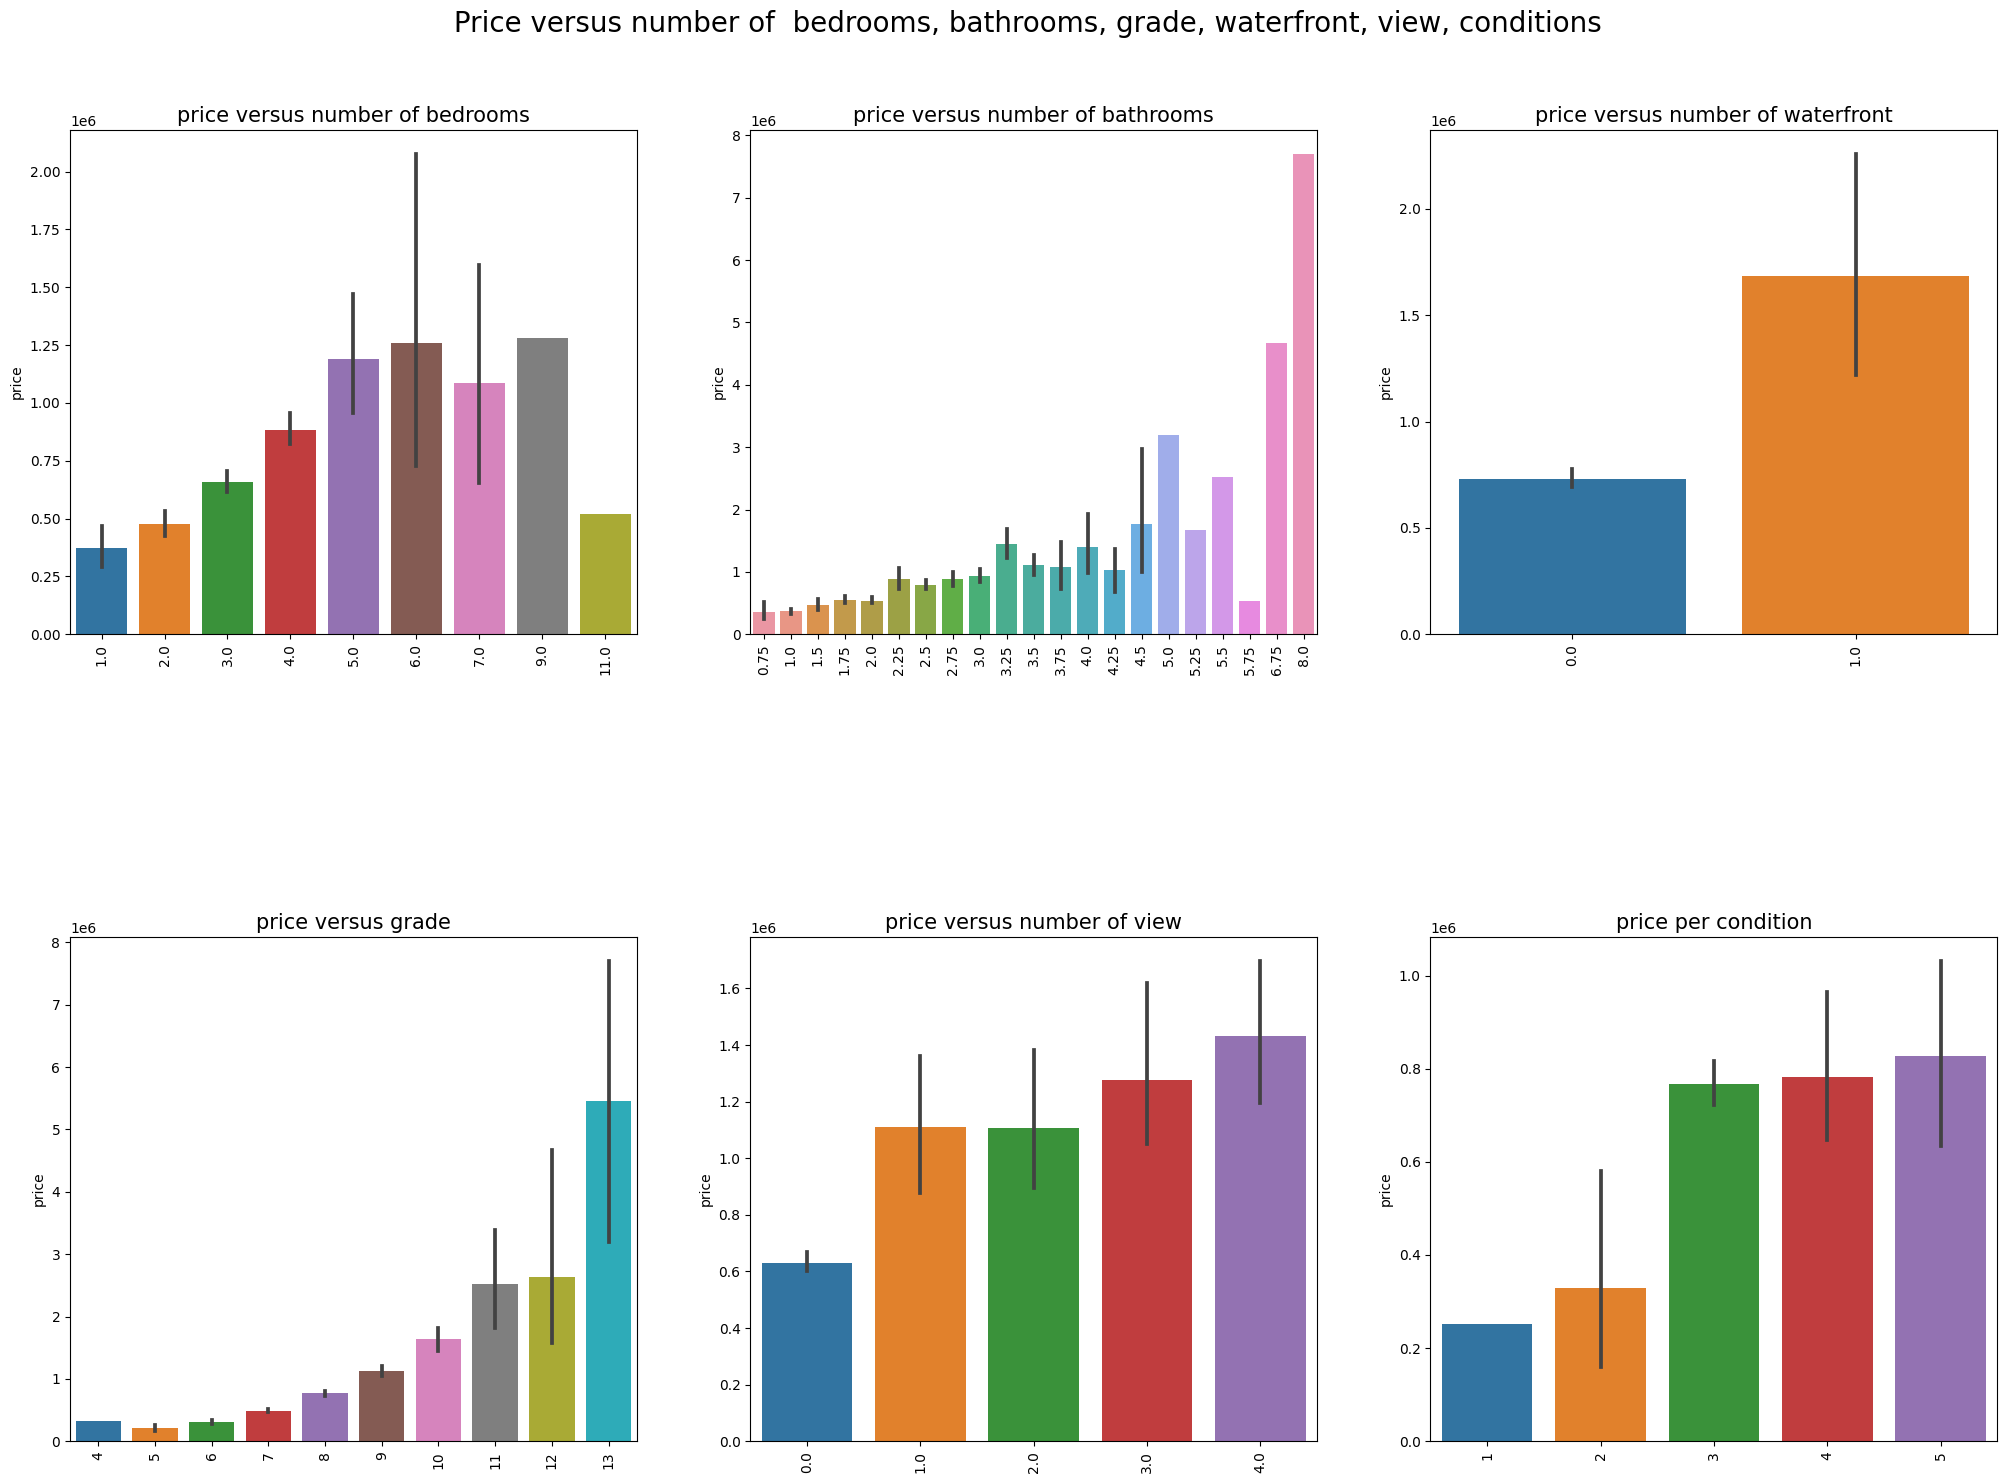

In [60]:
# Plot price by bedrooms, bathrooms, view, condition, grade, waterfront 
colors = ["#9ecae1", "#6baed6", "#3182bd", "#08519c"] 
fig, ax = plt.subplots(2,3, figsize=(20,15)) # create subplots on 2 rows and 2 columns
plt.suptitle(' Price versus number of  bedrooms, bathrooms, grade, waterfront, view, conditions', fontsize=20) 
fig.tight_layout()   # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .6, wspace = .2, top = .9) # adjusts the space between the single subplots

f1 = sns.barplot(x=df_n0["bedrooms"], y = df_n0['price'], ax=ax[0,0]) # creates barchart for number of views
f1.tick_params(axis='x', labelrotation=90) # sets the label y-axis
f1.set(xlabel=None) # sets the x-axis label
f1.set_ylabel("price", fontsize = 10) # limits the x-axis values from 0 to 1000000
f1.set_title("price versus number of bedrooms", fontsize = 15);  # sets title for subplot


f2= sns.barplot(x=df_n0["bathrooms"], y = df_n0['price'], ax=ax[0,1])
f2.tick_params(axis='x', labelrotation=90)
f2.set(xlabel=None)
f2.set_ylabel("price", fontsize = 10)
f2.set_title("price versus number of bathrooms", fontsize = 15);

f3 = sns.barplot(x=df_n0["waterfront"], y = df_n0['price'], ax=ax[0,2])
f3.tick_params(axis='x', labelrotation=90)
f3.set(xlabel=None)
f3.set_ylabel("price", fontsize = 10)
f3.set_title("price versus number of waterfront", fontsize = 15);

f4 = sns.barplot(x=df_n0["grade"], y = df_n0['price'], ax=ax[1,0])
f4.tick_params(axis='x', labelrotation=90)
f4.set(xlabel=None)
f4.set_ylabel("price", fontsize = 10)
f4.set_title("price versus grade", fontsize = 15);

f5 = sns.barplot(x=df_n0["view"], y = df_n0['price'], ax=ax[1,1])
f5.tick_params(axis='x', labelrotation=90)
f5.set(xlabel=None)
f5.set_ylabel("price", fontsize = 10)
#f6.tight_layout()              
f5.set_title("price versus number of view", fontsize = 15);


f6 = sns.barplot(x=df_n0["condition"], y = df_n0['price'], ax=ax[1,2])
f6.tick_params(axis='x', labelrotation=90)
f6.set(xlabel=None)
f6.set_ylabel("price", fontsize = 10)
#f6.tight_layout()              
f6.set_title("price per condition", fontsize = 15);





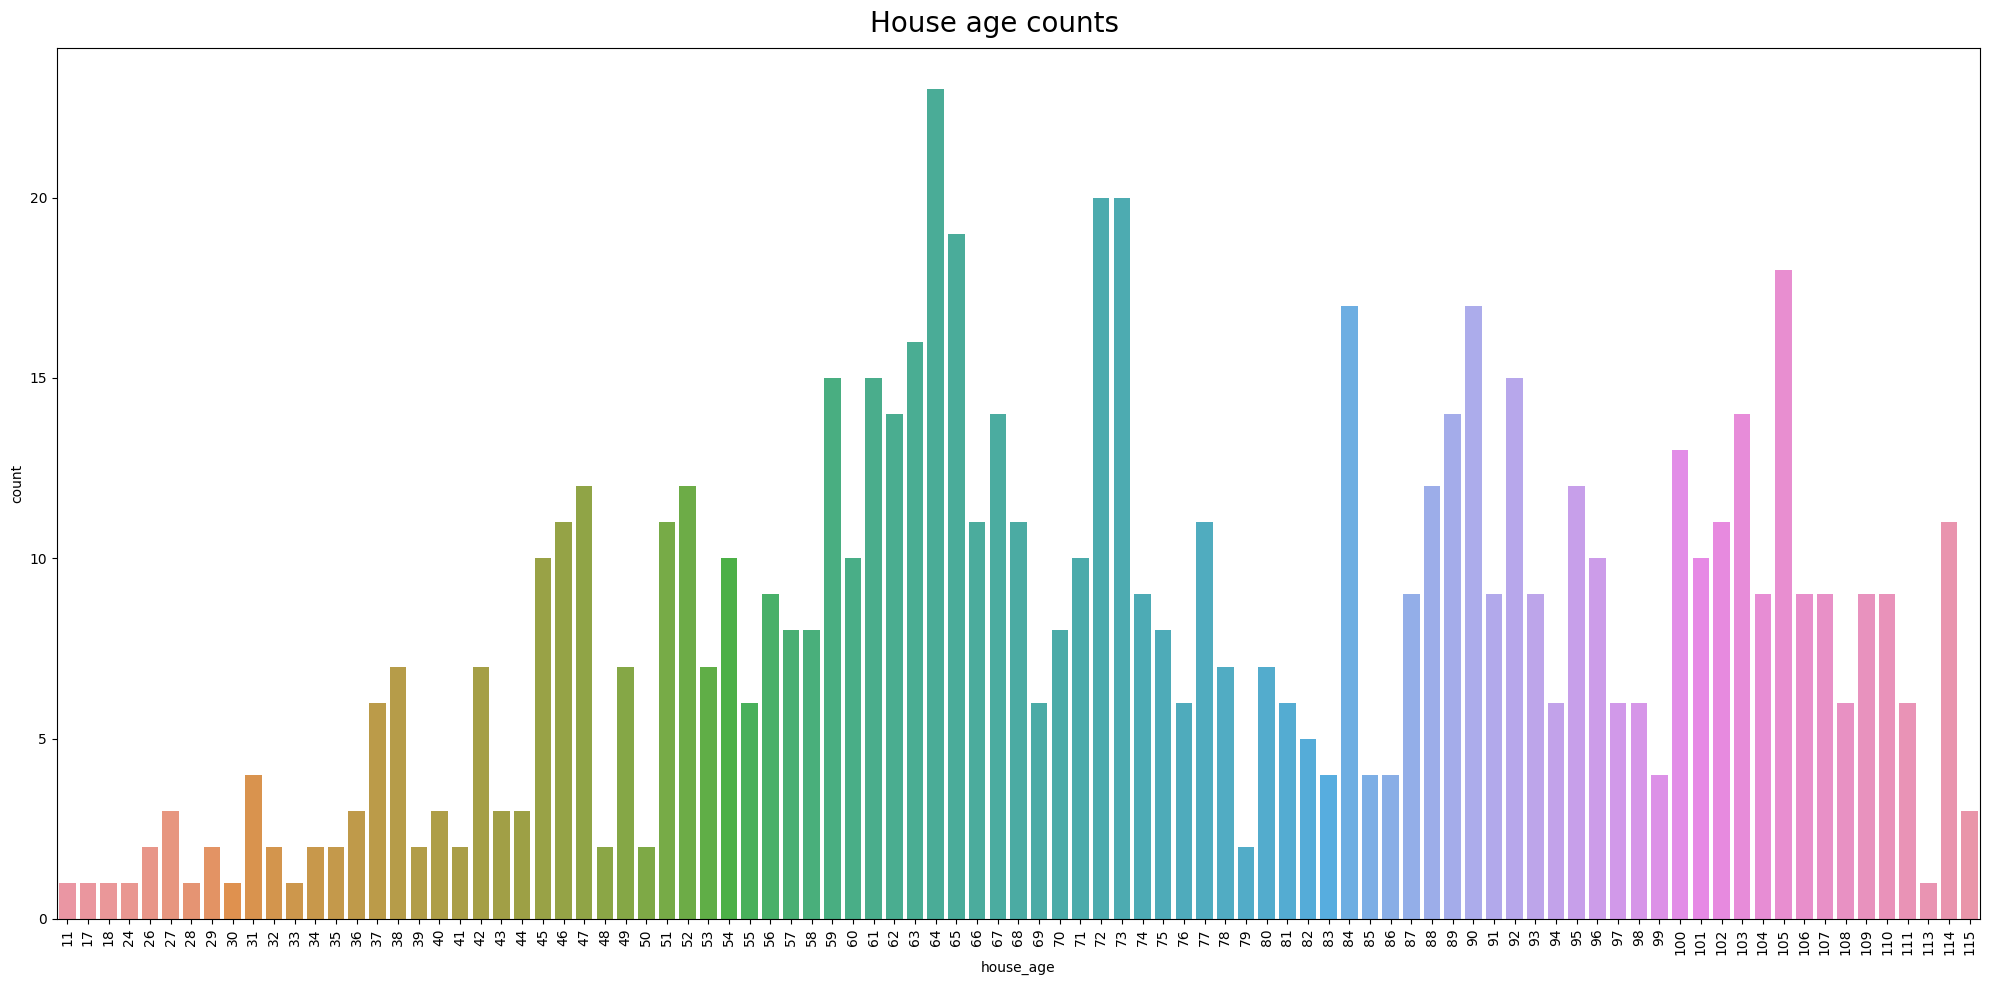

In [43]:
# Plot number of house_age
plt.figure(figsize=(20,10)) # specify figure size
plt.suptitle('House age counts', fontsize=20) 
f1 = sns.countplot(x=df_n0['house_age']) # create countplot
f1.tick_params(axis='x', rotation=90) # get x-ticks and rotate them
plt.tight_layout()
plt.savefig('Figures_EDA/count_vs_house_age.pdf')

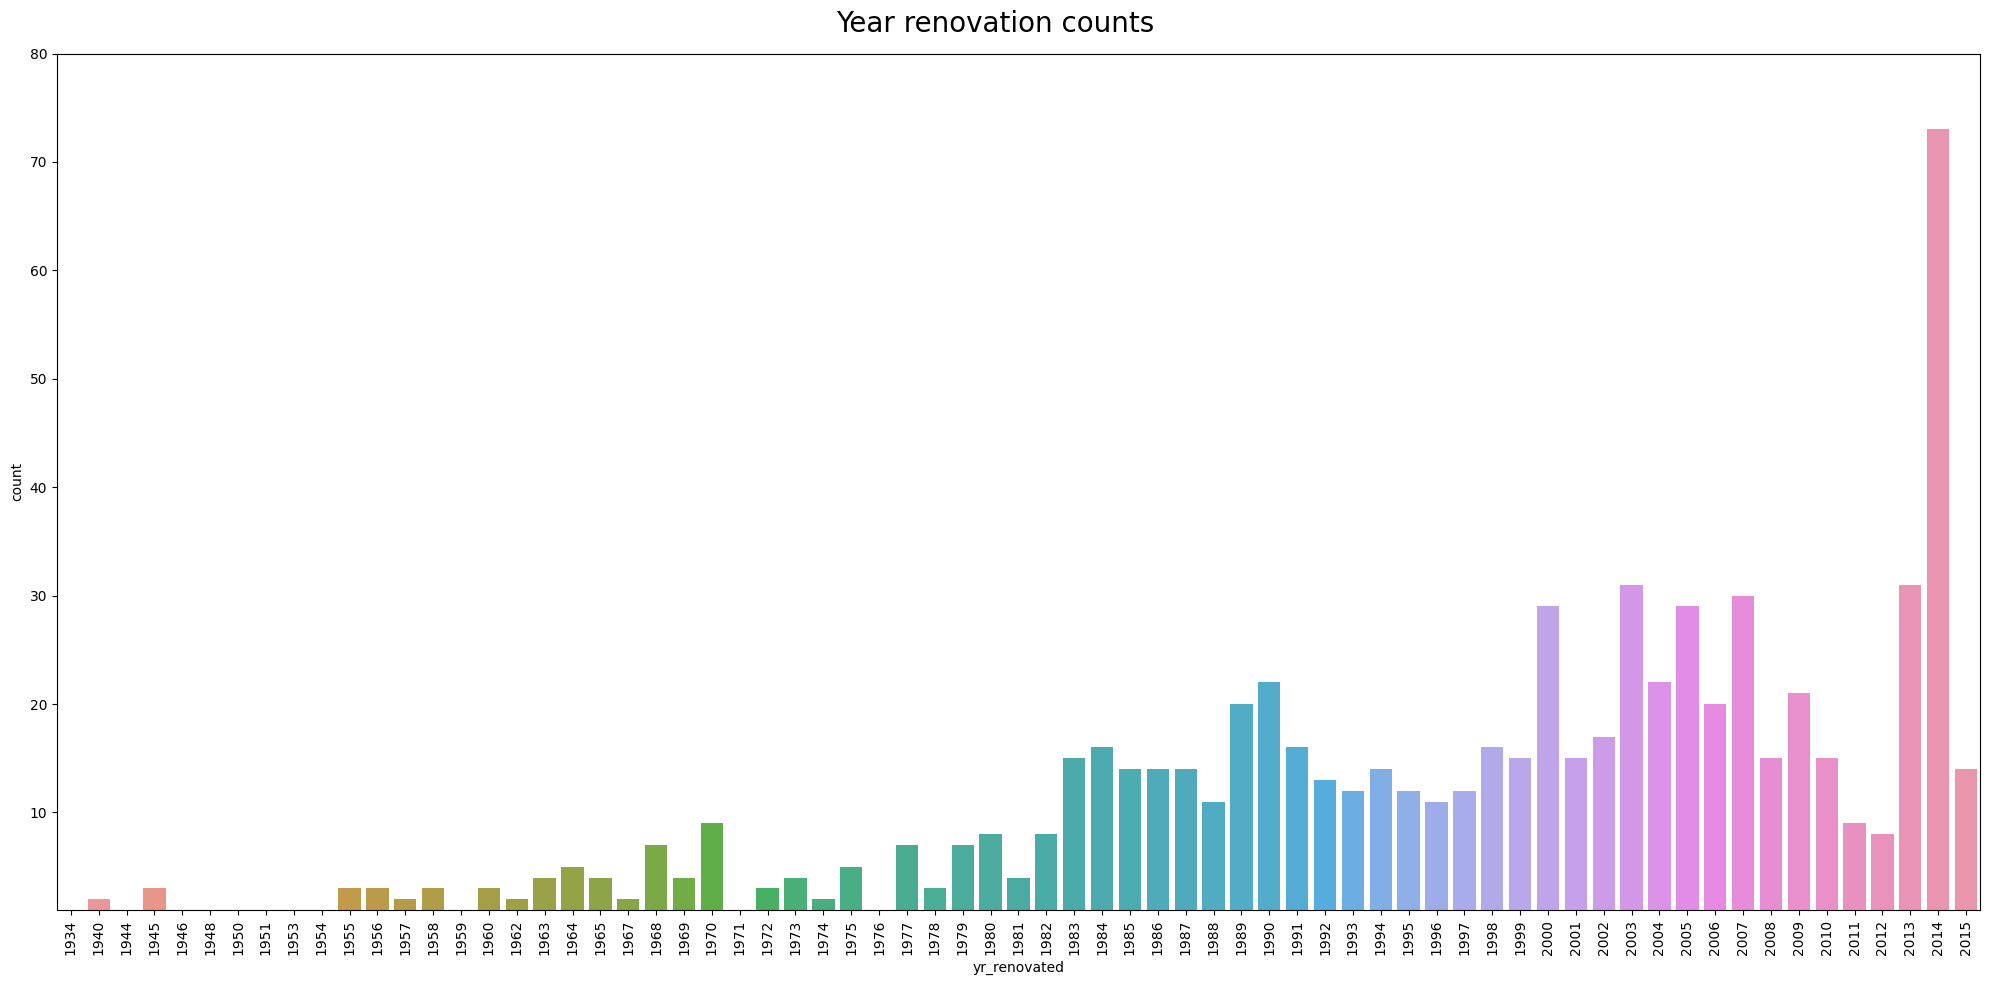

In [44]:
# Plot number of house_age
plt.figure(figsize=(20,10)) # specify figure size
plt.suptitle('Year renovation counts', fontsize=20) 
f1 = sns.countplot(x=df_n0['yr_renovated']) # create countplot
f1.tick_params(axis='x', rotation=90) # get x-ticks and rotate them
f1.set_ylim(1,80)
#f1.set_xlim(1,2015)
plt.tight_layout()
plt.savefig('Figures_EDA/count_vs_yrrenovated.pdf')

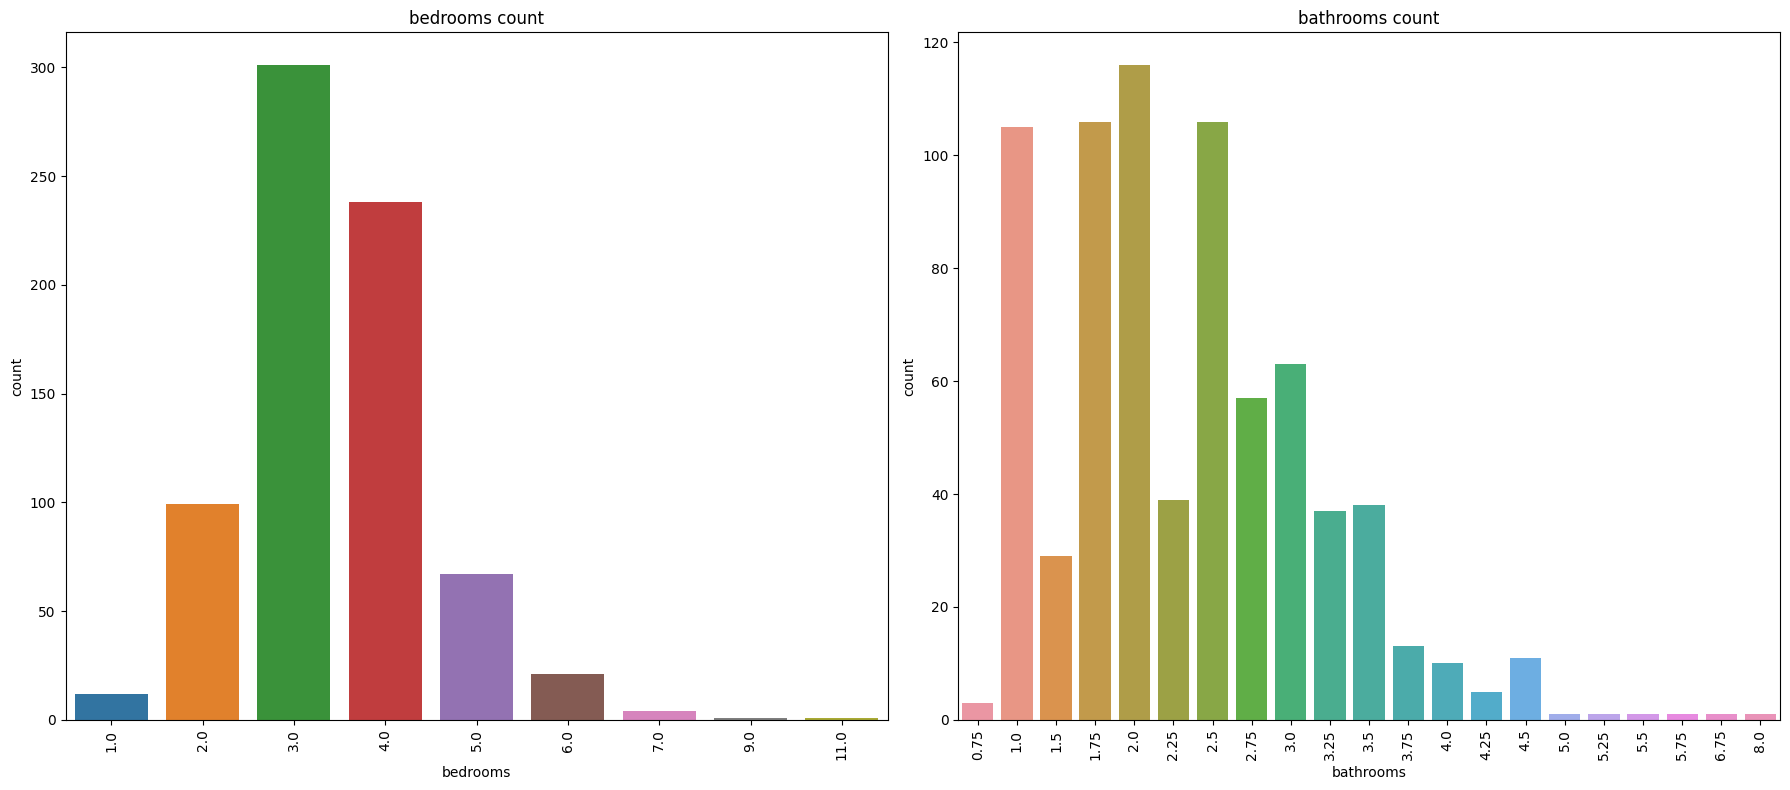

In [45]:
# Plot price by bedrooms, bathrooms, view, condition, grade, waterfront 
plt.figure(figsize = (18, 8))
plt.subplot(1,2,1)
sns.countplot(x=df_n0["bedrooms"]) # creates barchart for number of views
plt.tick_params(axis='x', rotation=90)
plt.title("bedrooms count")
plt.subplot(1,2,2)
sns.countplot(x=df_n0["bathrooms"])
plt.tick_params(axis='x', rotation=90)
plt.title("bathrooms count")
plt.tight_layout() 
plt.savefig('Figures_EDA/count_vs_bedrooms_bathrooms.pdf')
# Buyer priotrize  has 3 to 4 bedrooms and 1 to 2.5 bathrooms

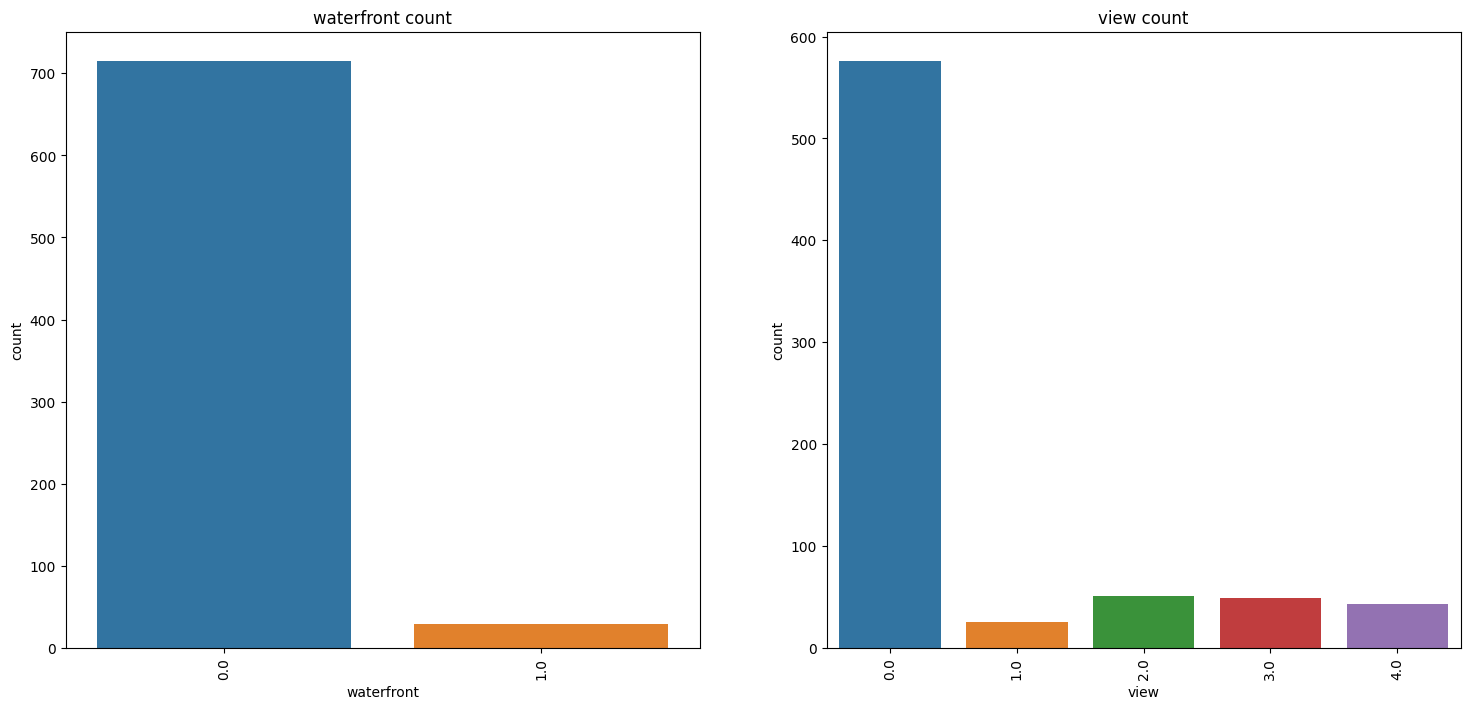

In [46]:
plt.figure(figsize = (18, 8))
plt.subplot(1,2,1)
sns.countplot(x=df_n0["waterfront"]) # creates barchart for number of views
plt.tick_params(axis='x', rotation=90)
plt.title("waterfront count")
plt.subplot(1,2,2)
sns.countplot(x=df_n0["view"])
plt.tick_params(axis='x', rotation=90)
plt.title("view count")
plt.savefig('Figures_EDA/count_vs_waterfront_view.pdf')
# 90 % of the house sold has 0 view bUyer do not care about view
# majority of  houses  doesn't have a waterfront
# Waterfront is not a feature to decide price

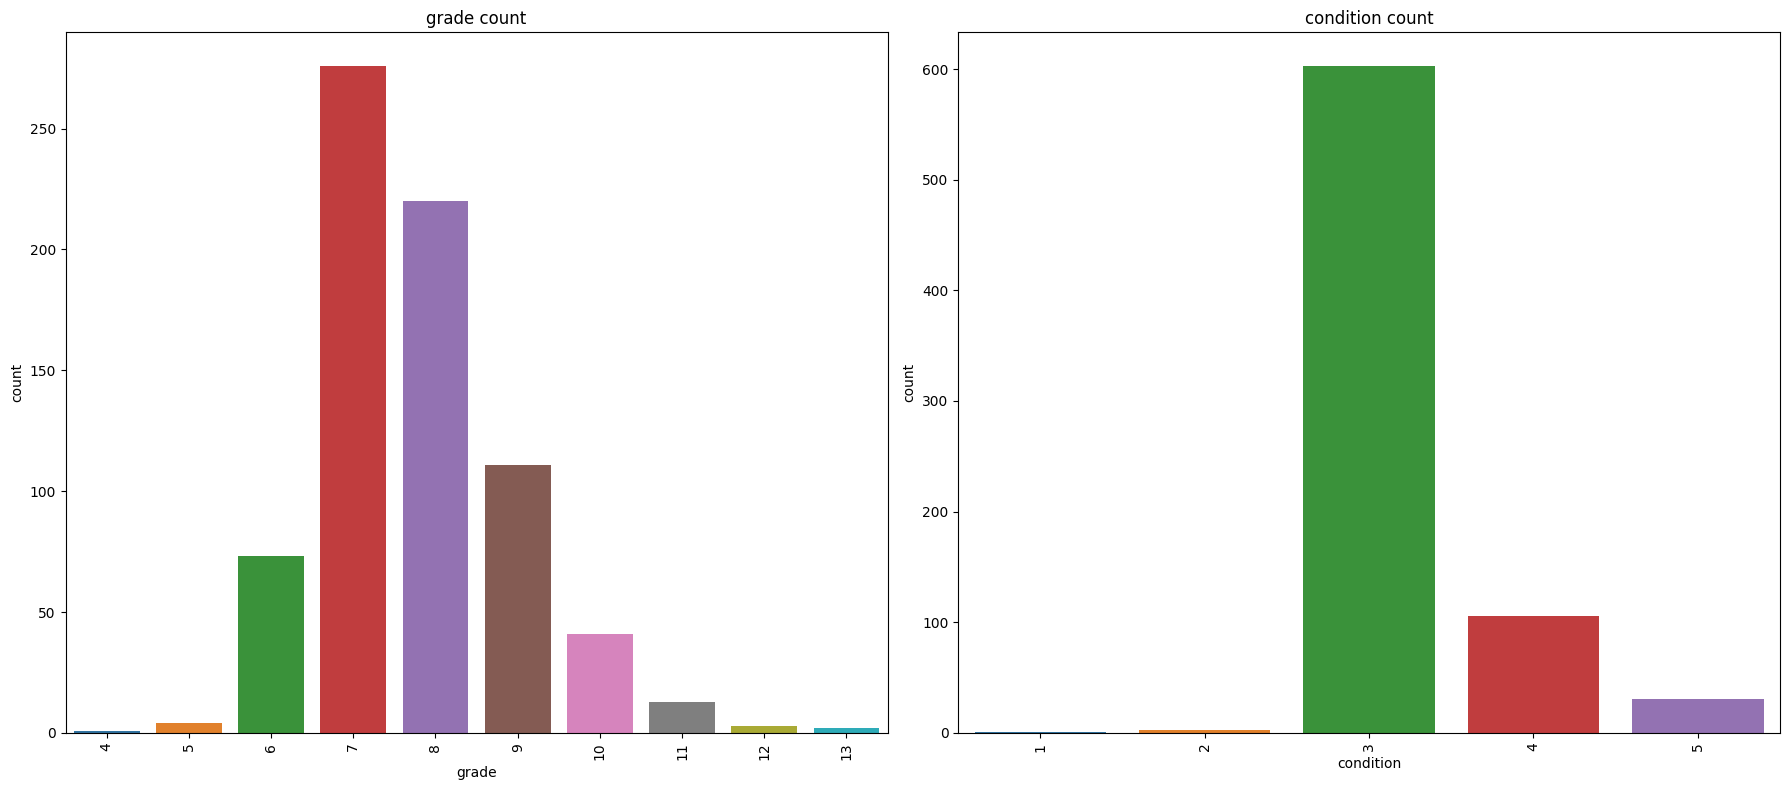

In [47]:
plt.figure(figsize = (18, 8))
plt.subplot(1,2,1)
sns.countplot(x=df_n0["grade"]) # creates barchart for number of views
plt.tick_params(axis='x', rotation=90)
plt.title("grade count")
plt.subplot(1,2,2)
sns.countplot(x=df_n0["condition"])
plt.tick_params(axis='x', rotation=90)
plt.title("condition count")
plt.tight_layout()
plt.savefig('Figures_EDA/count_vs_grade_condition.pdf')
#Majority of houses sold in grade between 6 and 9
# 7 (high), 8(second high), 98(third), 6(fourth), 10(fifth)

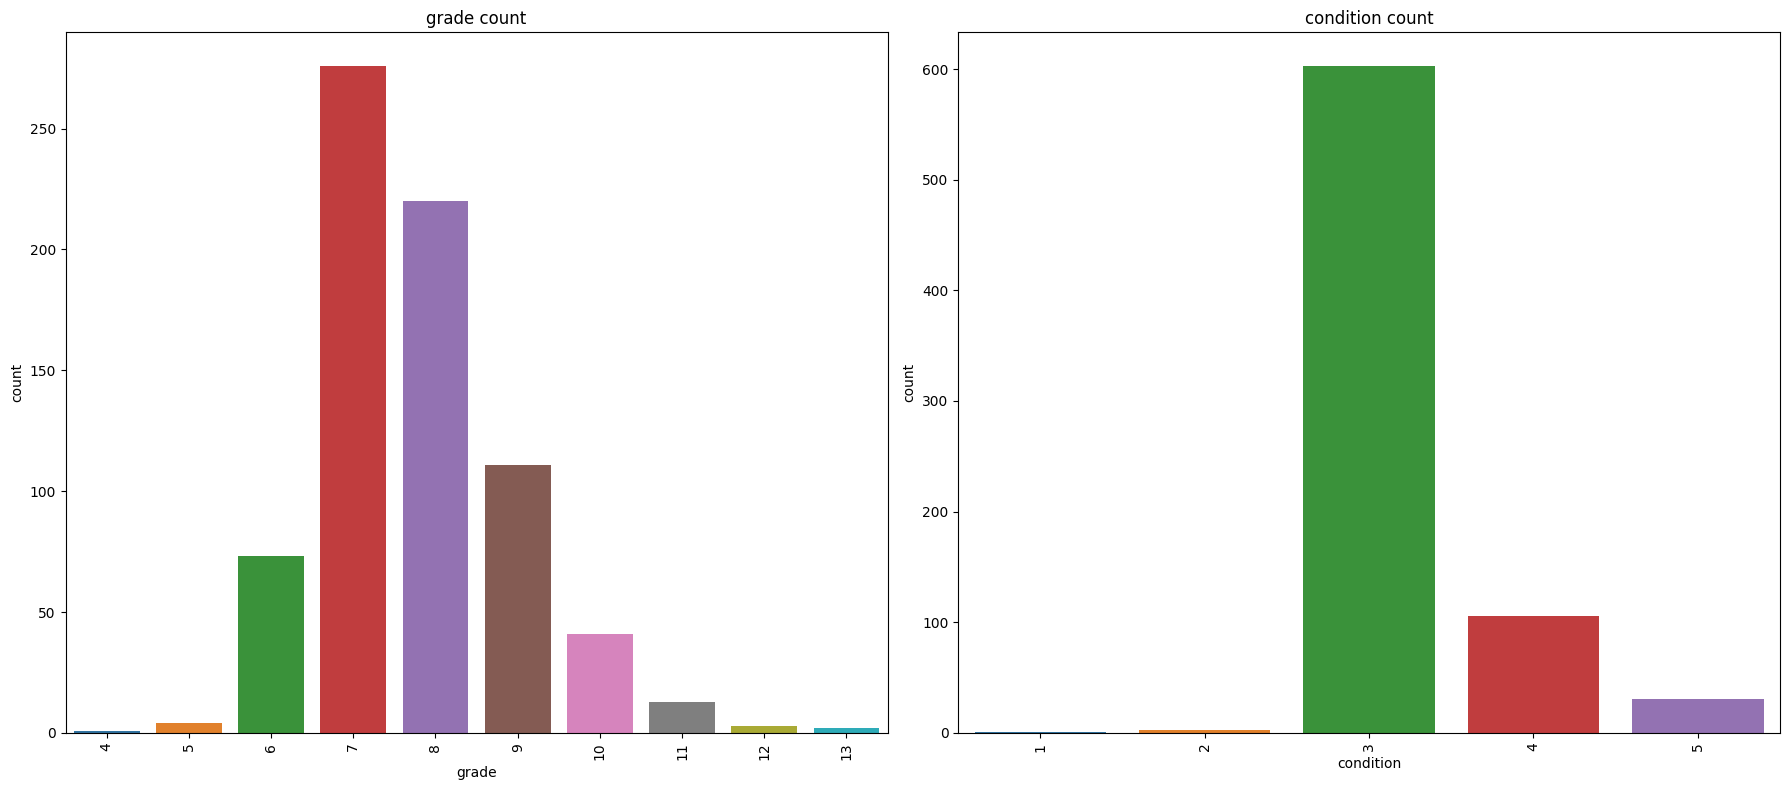

In [48]:
plt.figure(figsize = (18, 8))
plt.subplot(1,2,1)
sns.countplot(x=df_n0["grade"]) # creates barchart for number of views
plt.tick_params(axis='x', rotation=90)
plt.title("grade count")
plt.subplot(1,2,2)
sns.countplot(x=df_n0["condition"])
plt.tick_params(axis='x', rotation=90)
plt.title("condition count")
plt.tight_layout()
plt.savefig('Figures_EDA/count_vs_grade_condition.pdf')
#Majority of houses sold in grade between 6 and 9
# 7 (high), 8(second high), 98(third), 6(fourth), 10(fifth)

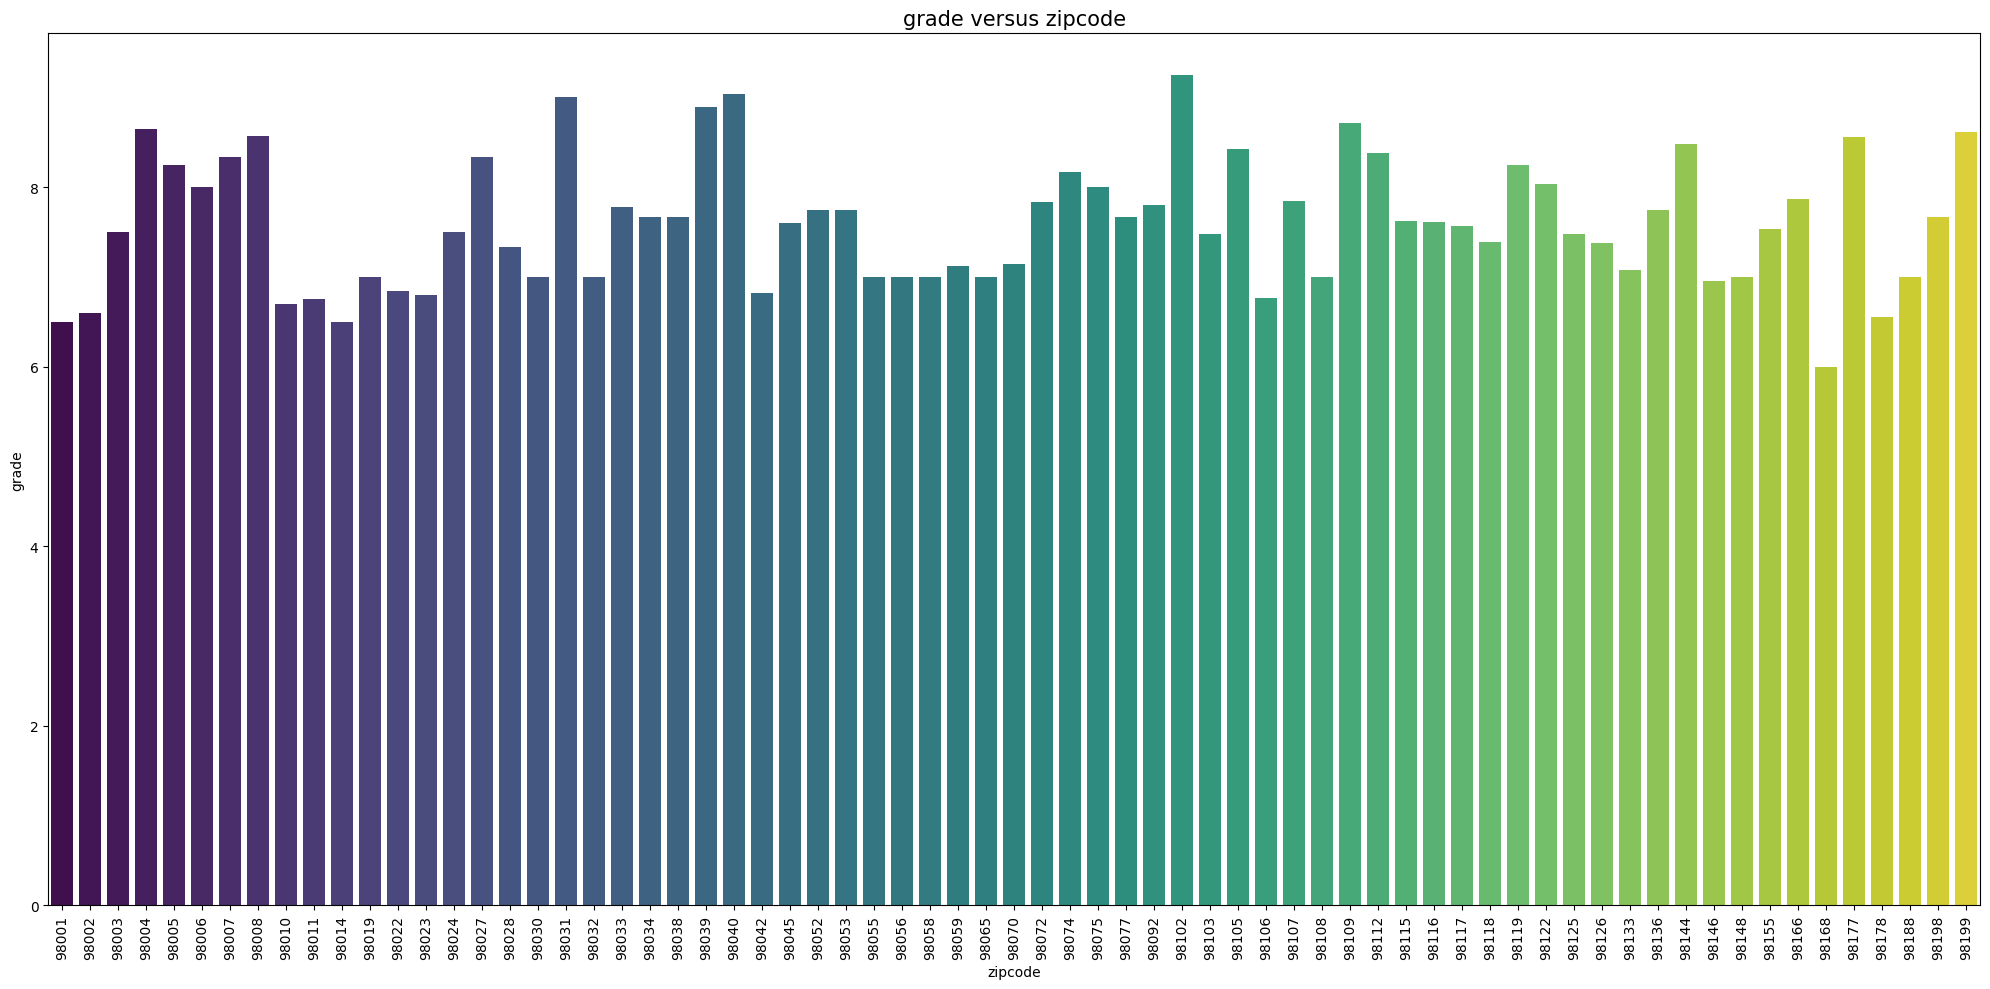

In [49]:
plt.figure(figsize = (20, 10))
sns.barplot(x = 'zipcode', y= 'grade', data = df_n0, palette = 'viridis',ci = False)
plt.xticks(rotation = 90)
plt.title("grade versus zipcode", fontsize = 15)
plt.tight_layout()
plt.savefig('Figures_EDA/grade_vs_zipcode_barplot.pdf')
#zipcode 98039,98004, 98040 - highest price 
#zipcode 98002,98168, 98032 - lowest price

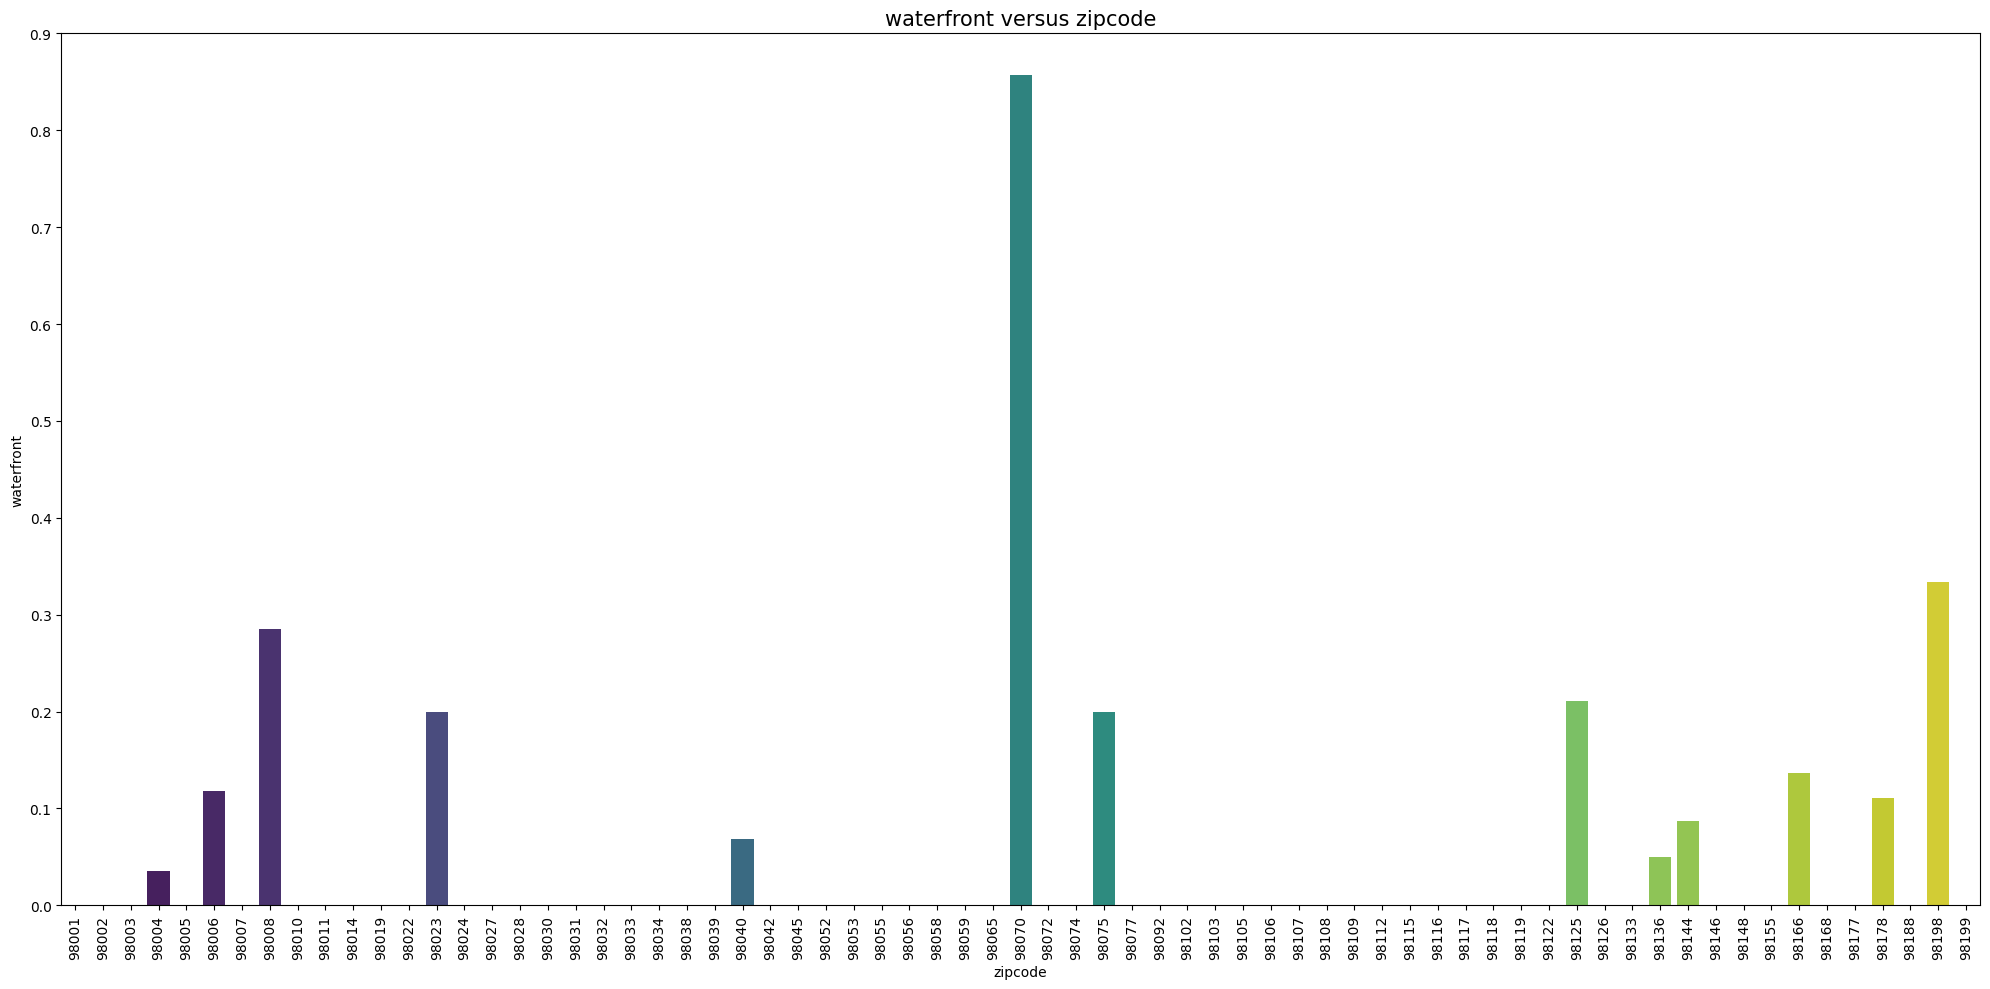

In [50]:
plt.figure(figsize = (20, 10))
sns.barplot(x = 'zipcode', y= 'waterfront', data =df_n0 , palette = 'viridis',ci = False)
plt.xticks(rotation = 90)
plt.title("waterfront versus zipcode", fontsize = 15)
plt.tight_layout()
plt.savefig('Figures_EDA/waterfront_vs_zipcode_barplot.pdf')
#zipcode 98039,98004, 98040 - highest price 
#zipcode 98002,98168, 98032 - lowest price

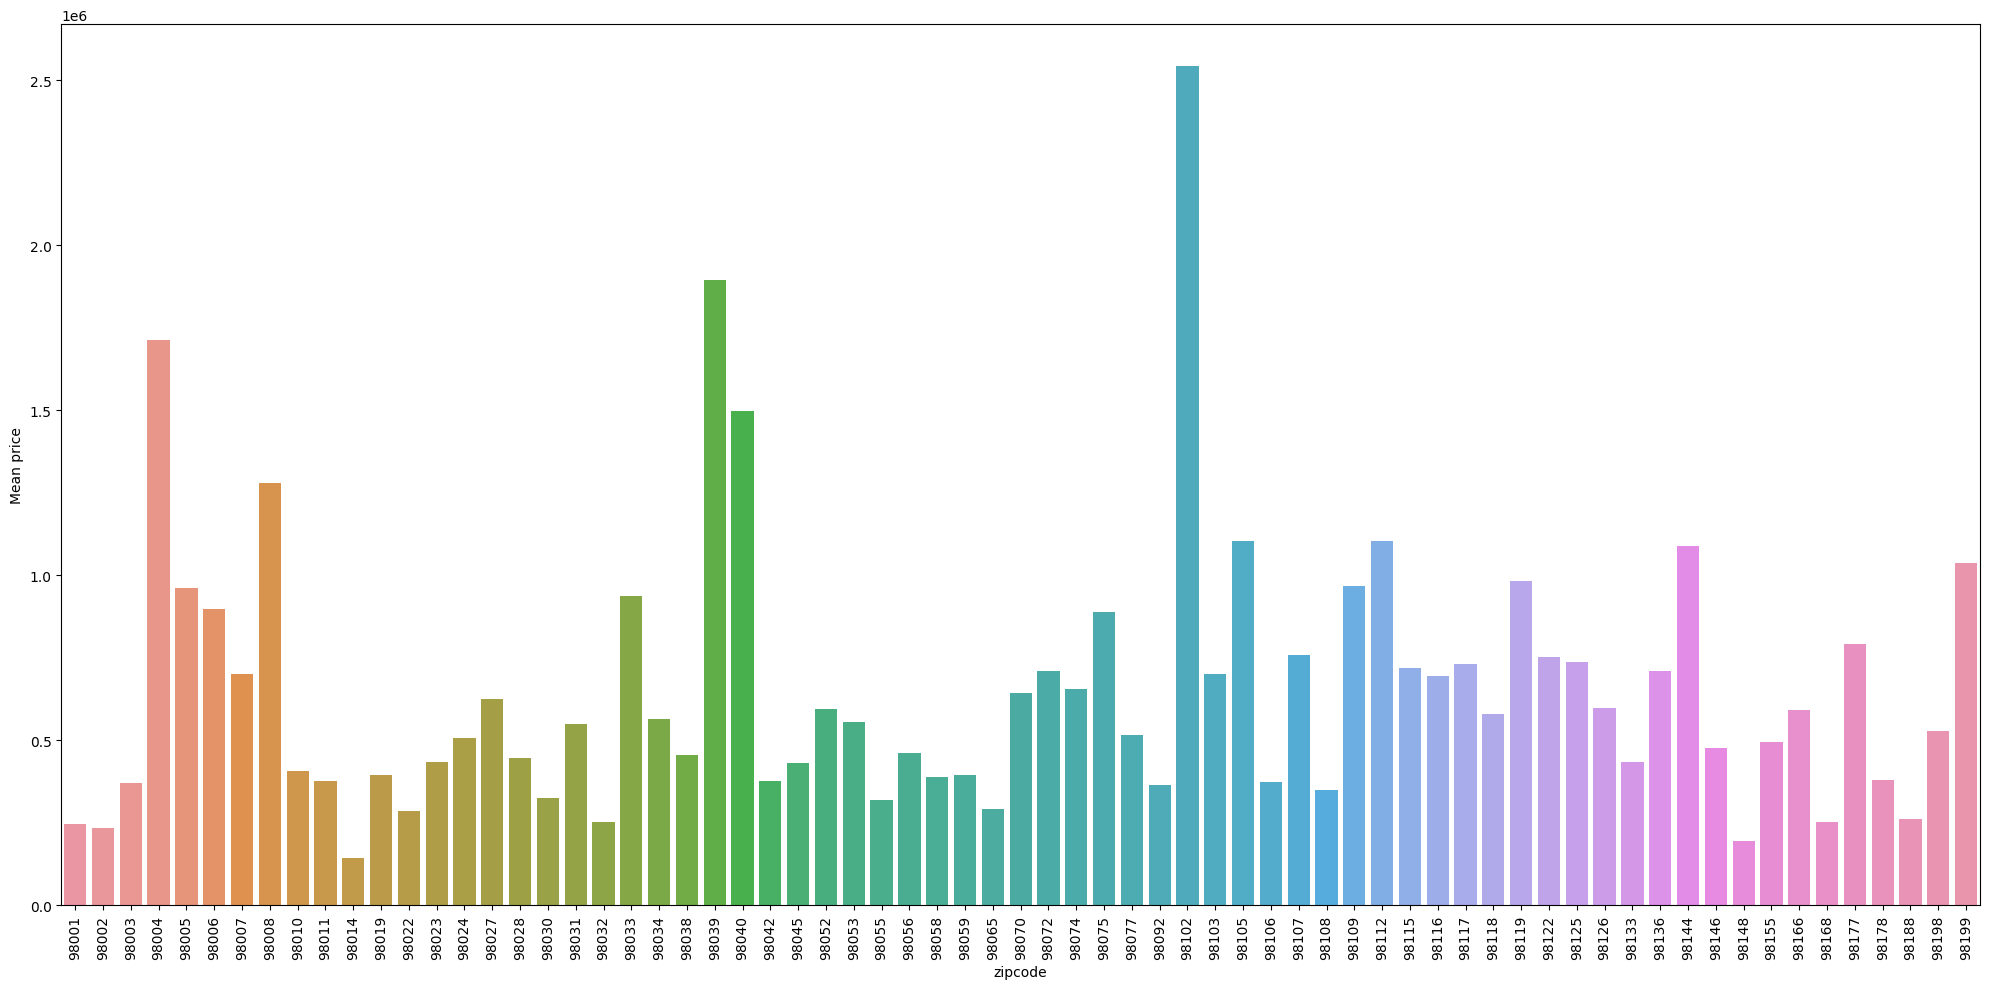

In [51]:
plt.figure(figsize = (20, 10))
df_zipcode = df_n0.groupby('zipcode')['price'].mean()
df_zipcode = df_zipcode.reset_index()
df_zipcode_plot=sns.barplot(x='zipcode', y='price', data=df_zipcode)
df_zipcode_plot.set(ylabel=None) # sets the x-axis label
df_zipcode_plot.set_ylabel("Mean price", fontsize = 10)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Figures_EDA/meanprice_vs_zipcode_barplot.pdf')
plt.show()

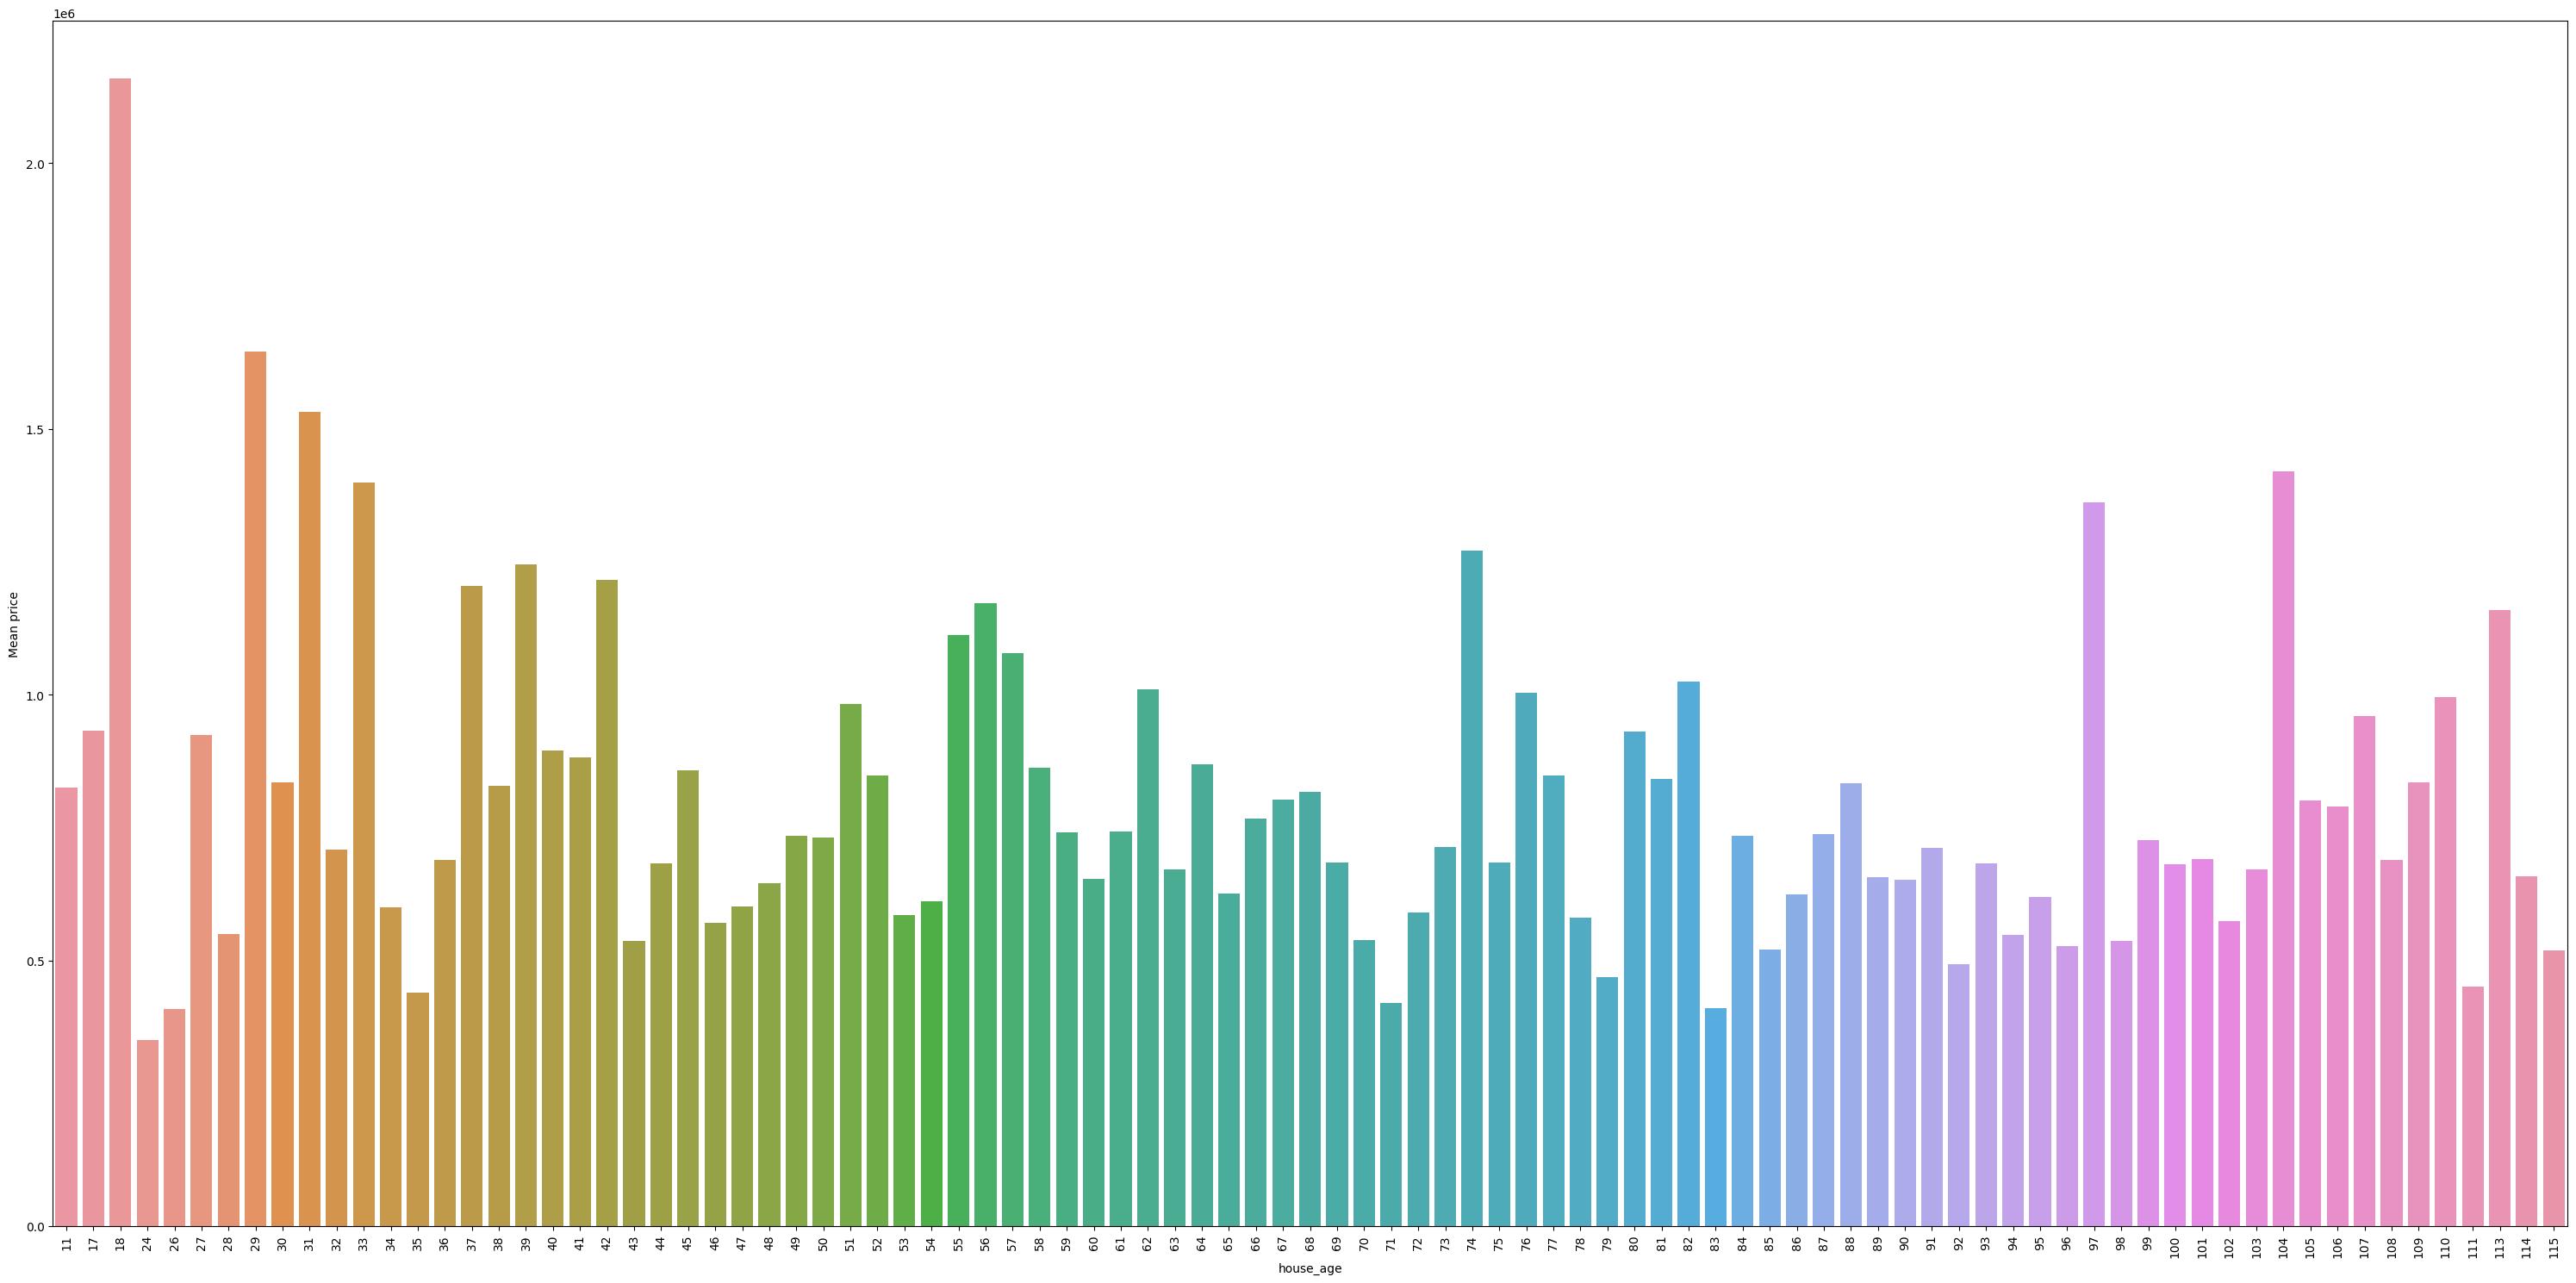

In [52]:
plt.figure(figsize = (30, 15))
df_house_age = df_n0.groupby('house_age')['price'].mean()
df_house_age = df_house_age.reset_index()
df_house_age_plot=sns.barplot(x='house_age', y='price', data=df_house_age)
df_house_age_plot.set(ylabel=None) # sets the x-axis label
df_house_age_plot.set_ylabel("Mean price", fontsize = 10)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Figures_EDA/meanprice_vs_house_age_barplot.pdf')
plt.show()

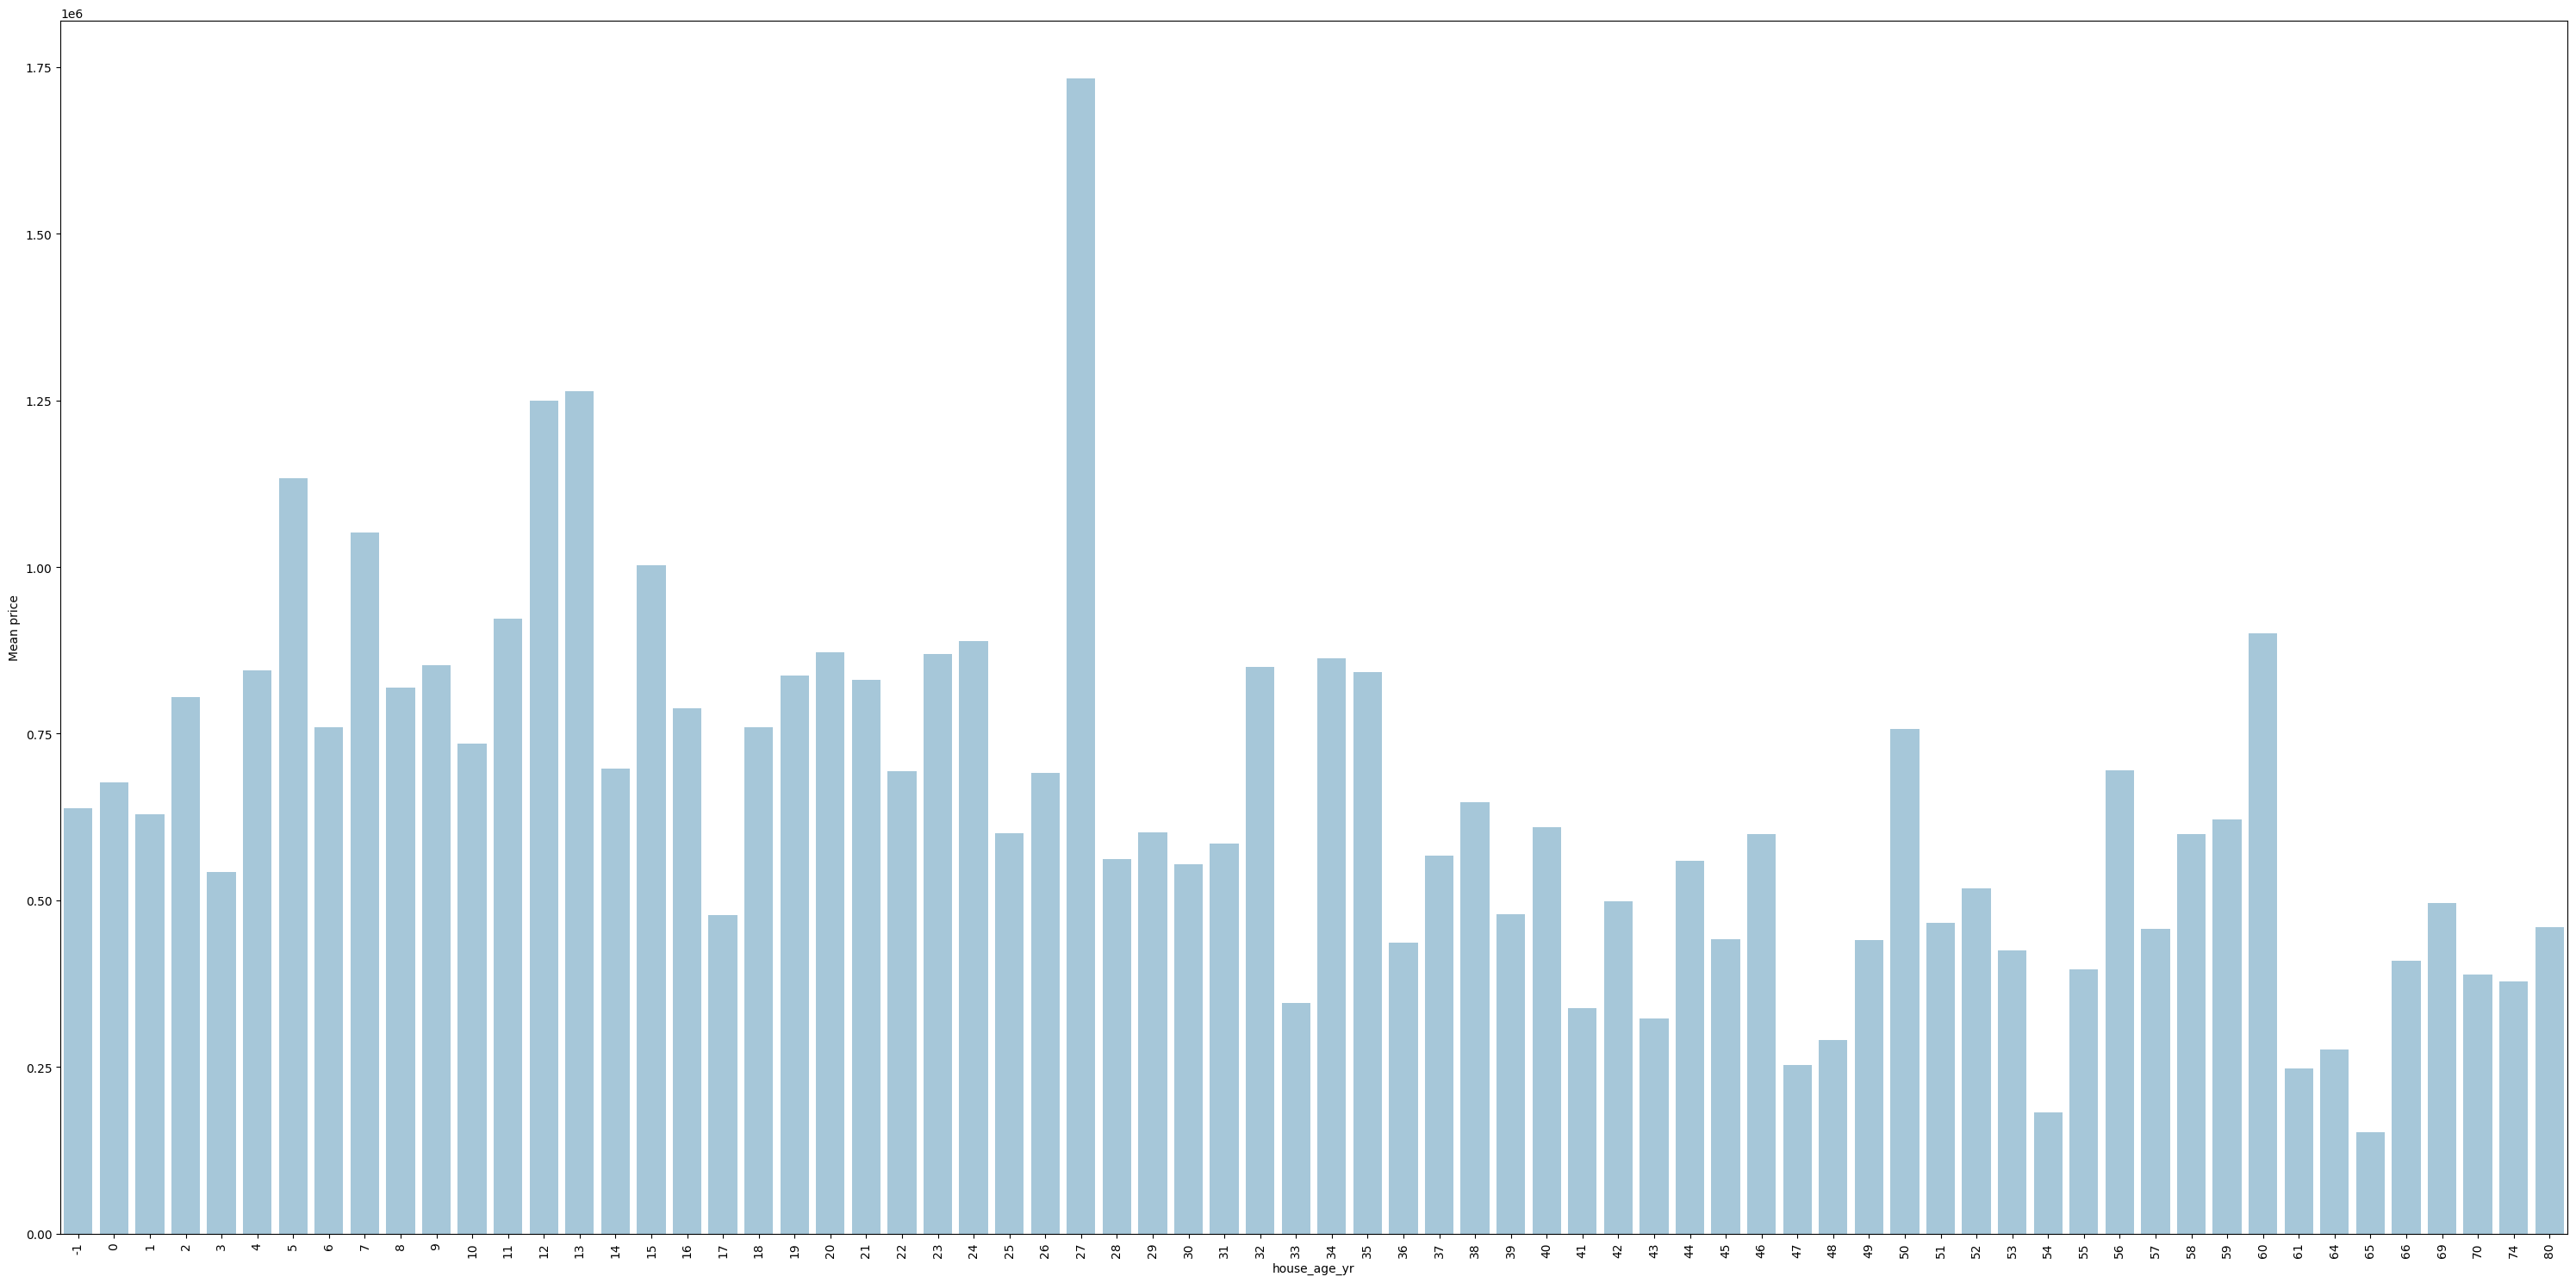

In [53]:
plt.figure(figsize = (30, 15))
df_house_age = df_n0.groupby('house_age_yr')['price'].mean()
df_house_age = df_house_age.reset_index()
df_house_age_plot=sns.barplot(x='house_age_yr', y='price', data=df_house_age, color="#9ecae1")
df_house_age_plot.set(ylabel=None) # sets the x-axis label
df_house_age_plot.set_ylabel("Mean price", fontsize = 10)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Figures_EDA/meanprice_vs_house_age_yr_barplot.pdf')
plt.show()

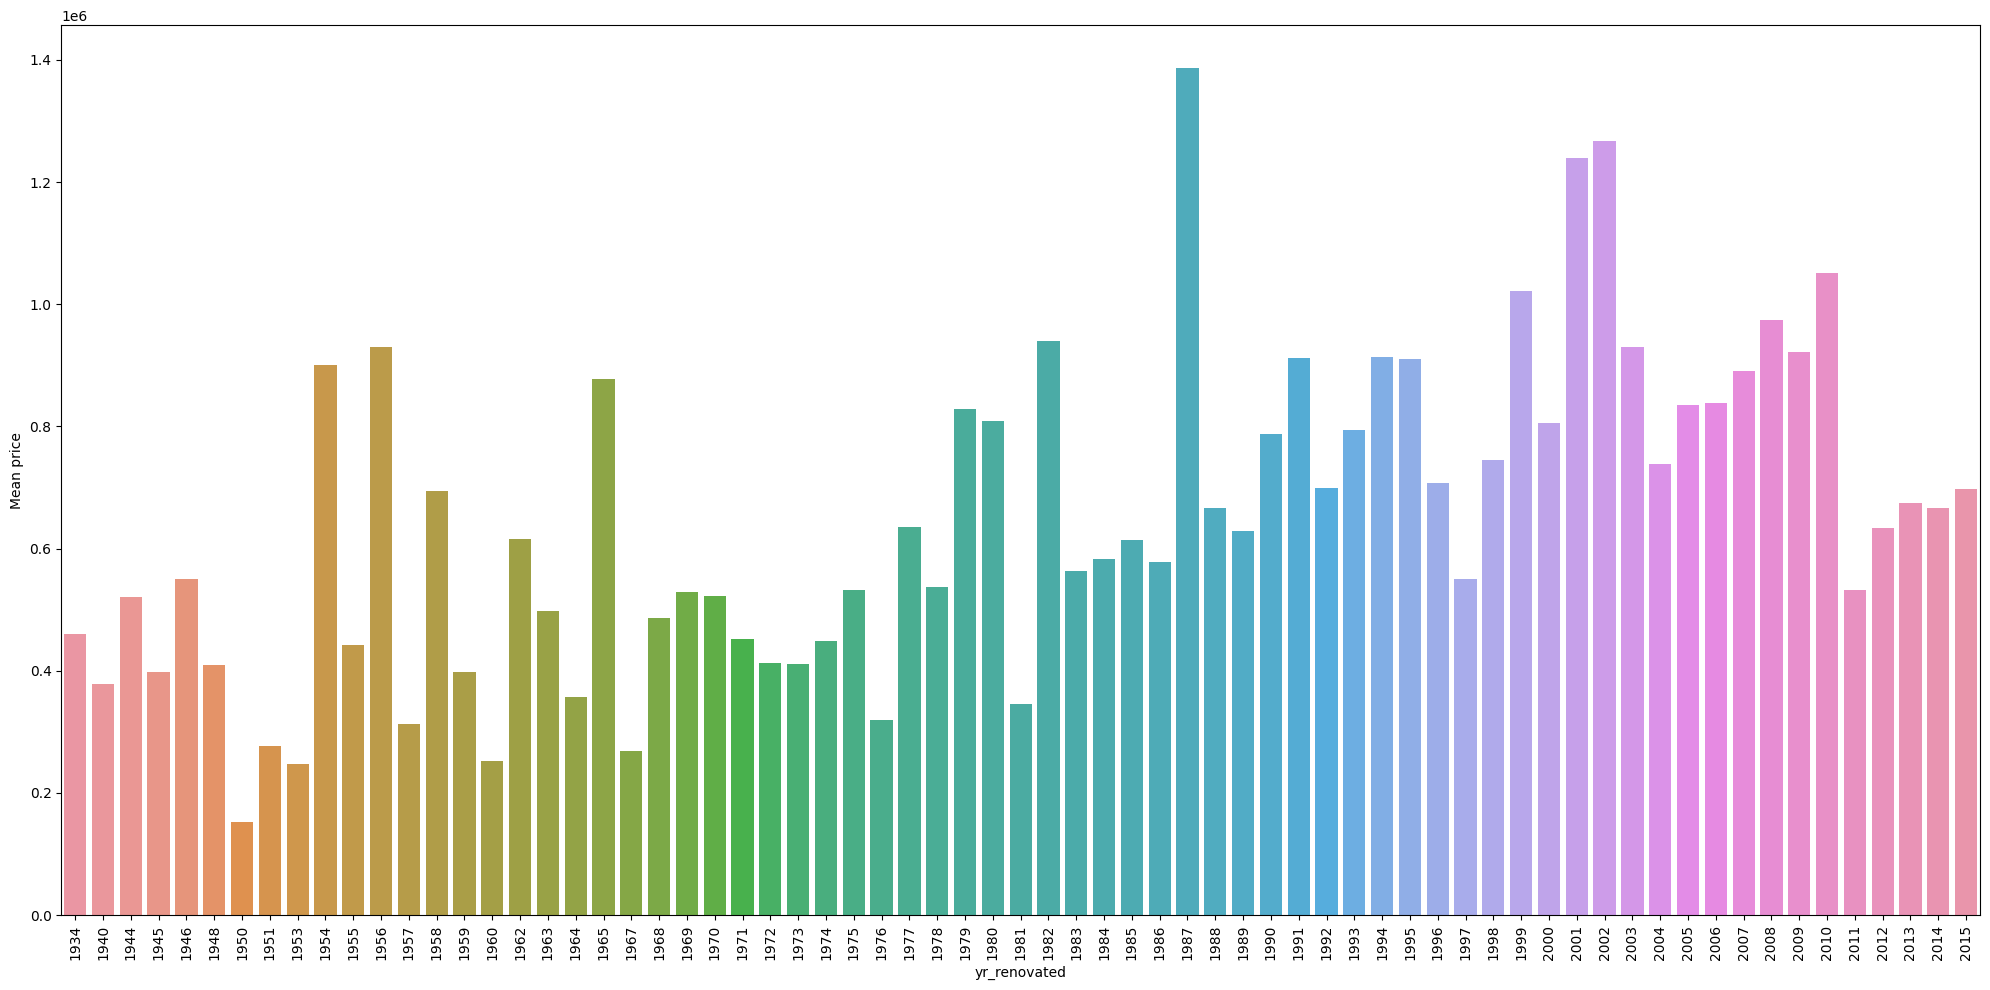

In [54]:
plt.figure(figsize = (20, 10))
df_yr_renovated = df_n0.groupby('yr_renovated')['price'].mean()
df_yr_renovated = df_yr_renovated.reset_index()
df_yr_renovated_plot=sns.barplot(x='yr_renovated', y='price', data=df_yr_renovated)
df_yr_renovated_plot.set(ylabel=None) # sets the x-axis label
df_yr_renovated_plot.set_ylabel("Mean price", fontsize = 10)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Figures_EDA/meanprice_vs_yrrenovated_barplot.pdf')
plt.show()

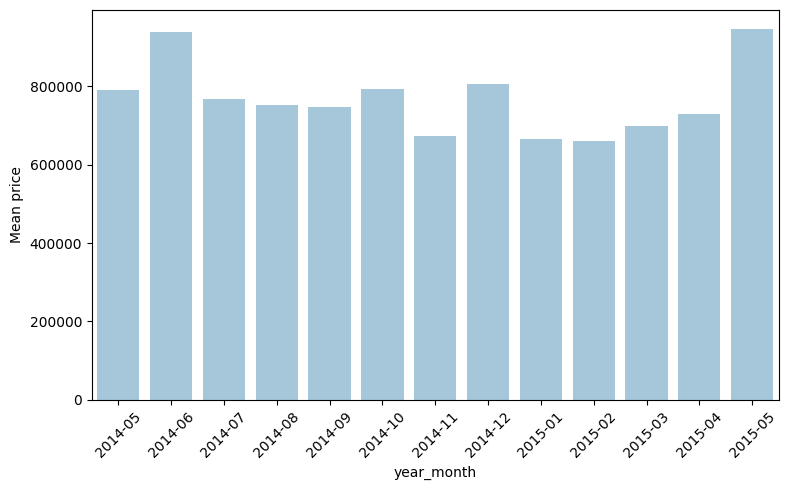

In [55]:
df_00 = df_n0.groupby('year_month')['price'].mean()
df_00 = df_00.reset_index()
df_00_plot=sns.barplot(x='year_month', y='price', data=df_00, color="#9ecae1")
df_00_plot.set(ylabel=None) # sets the x-axis label
df_00_plot.set_ylabel("Mean price", fontsize = 10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Figures_EDA/meanprice_yearmonth_barplot.pdf')
plt.show()

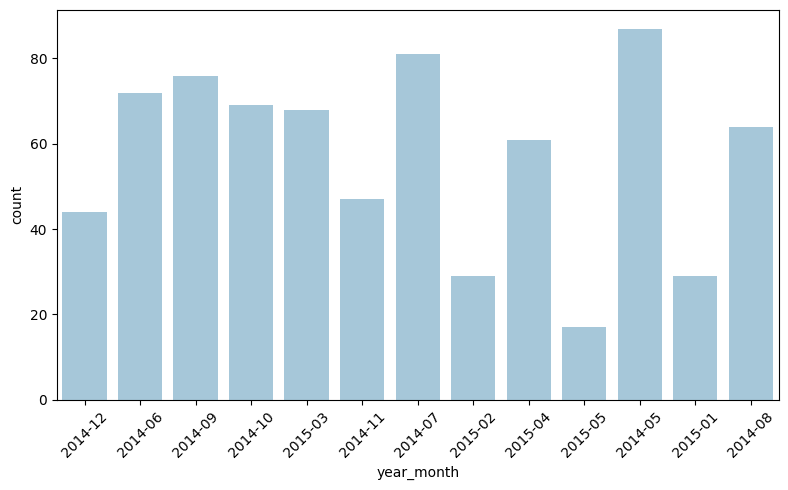

In [56]:

#print(df_n0["year_month"])
colors = ["#9ecae1", "#6baed6", "#3182bd", "#08519c"] 
sns.countplot(x=df_n0["year_month"], color="#9ecae1")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Figures_EDA/count_yearmonth.pdf')

Some insights about  the sales from the whole data sets;

* Zipcode is an identifiers of houses 

* Zipcodes 98039, 98004, 98040 - highest price 

* Zipcodes 98002, 98168, 98032 - lowest price

* Majority of houses sold in grade between 6 and 9

* Most of the house sold has 0 view.  Buyers do not care about view

* Majority of  houses  doesn't have a waterfront.

* Buyer prioritize 3 to 4 bedrooms and 1 to 2.5 bathrooms

* House with a waterfront has more price

* Buyer prioritize  house with  2 to 3 floors.  House with 2.5 floors has maximum price

* Most of the houses are in average condition

* Grade of a house is an important factor  for the price of house

* Houses with less than one year of age has the highest median price

* The price of house is highly correlated with the living space


